<a href="https://colab.research.google.com/github/fireteamtorch/genshin_survey_analysis/blob/main/Vol.%203/GenshinSurveyVol3Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import itertools
import warnings

In [ ]:
sheet_id = '1VAwtUXtvCmZ5qywTojp9HZYsMEZquHiZ9FQ2TRZ1zDg'
sheet_name_rank = 'CharacterRanks'
sheet_name_meta = 'CharacterData'
url_rank = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_rank}'
url_meta = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_meta}'

In [ ]:
pdf_rank_raw = pd.read_csv(url_rank)
pdf_meta_raw = pd.read_csv(url_meta)

In [ ]:
char_names_dict = {
    'Yunjin' : 'Yun Jin',
    'Hutao' : 'Hu Tao',
    'Kujou Sara' : 'Sara',
    'Kuki Shinobu' : 'Shinobu',
    'YaoYao' : 'Yaoyao',
    'Yae Miko' : 'Yae',
    'Kaedehara Kazuha' : 'Kazuha',
    'Sangonomiya Kokomi' : 'Kokomi',
    'Buer' : 'Nahida',
    'Kamisato Ayaka' : 'Ayaka',
    'Kamisato Ayato' : 'Ayato',
    'Baal' : 'Raiden',
    'Naganohara Yoimiya' : 'Yoimiya',
    'Shikanoin Heizou' : 'Heizou',
    'Amy' : 'Fischl',
    'Morax' : 'Zhongli',
    'Barbatos' : 'Venti',
    'Arataki Itto' : 'Itto',
    'Xinqiu' : 'Xingqiu',
    'Raiden Shogun' : 'Raiden',
    'Childe' : 'Tartaglia',
    'Ninguang' : 'Ningguang',
    'Kuki' : 'Shinobu',
    'Colei' : 'Collei',
    'Kazhua' : 'Kazuha',
    'Kiara' : 'Kirara',
    'Candance' : 'Candace',
    'Yao Yao' : 'Yaoyao',
    'Qi Qi' : 'Qiqi',
    'Aetha' : 'Aether',
    'Faruzhan' : 'Faruzan'
}

responder_list = [
    'David', 'Shoe', 'Jason', 'Seika',
    'FrOzEn', 'Amethyst', 'Chloe', 'Hiro',
    'Amy', 'Alice', 'Zabrina', 'Erin',
]

lettergrade_dict = {
    'D' : 1,
    'C' : 2,
    'B' : 3,
    'A' : 4,
    'S' : 5,
}

genshincolor_dict = {
    'Pyro': '#EF7938',
    'Hydro' : '#4CC2F1',
    'Anemo' : '#74C2A8',
    'Cryo' : '#9FD6E3',
    'Geo' : '#FAB632',
    'Electro' : '#AF8EC1',
    'Dendro' : '#A5C83B',
    '4star' : '#8D6DB3',
    '5star' : '#FFCA45',
    '5star_standard' : '#BE7531',
}

In [ ]:
def CorrectCharacterName(char_name_old):
  if char_name_old in char_names_dict:
    return char_names_dict[char_name_old]
  else:
    return char_name_old

In [ ]:
pdf_all_chars = pdf_meta_raw[['Name']]
pdf_all_chars = pdf_all_chars.rename(columns = {'Name' : 'Character'})

num_characters = len(pdf_all_chars)

# Edit the dataframes

In [ ]:
pdf_rank_edit = pdf_rank_raw.copy()
pdf_rank_edit = pdf_rank_edit.drop(columns = ['Sample', 'Sample Grade', 'Erin Fixed Ranking'])
pdf_rank_edit

,Rank,David,David Grade,Shoe,Shoe Grade,Jason,Jason Grade,Seika,Seika Grade,FrOzEn,...,Hiro,Hiro Grade,Amy,Amy Grade,Alice,Alice Grade,Zabrina,Zabrina Grade,Erin,Erin Grade
0,1,Ganyu,S,Aether,S,ZhongLi,S,Lumine,S,Yun Jin,...,Xiao,S,Hu Tao,S,Nahida,S,Yae,S,Lisa,S
1,2,Nahida,S,Lumine,S,Hu Tao,S,Zhongli,S,Baizhu,...,Diluc,S,Kaveh,S,Zhongli,S,Layla,A,Xiangling,S
2,3,Hu Tao,A,Yoimiya,S,Kazuha,S,Baizhu,S,Klee,...,Kaveh,S,Shenhe,S,Yun Jin,A,Yanfei,A,Dori,S
3,4,Dehya,A,Yae,S,Kaveh,S,Jean,A,Qiqi,...,Alhaitham,S,Itto,S,Venti,A,Kokomi,A,Kaeya,A
4,5,Zhongli,A,Yelan,S,Itto,S,Yanfei,A,Kuki Shinobu,...,Kaeya,S,Xiao,S,Dehya,A,Ningguang,A,Xinyan,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,Kazuha,D,Diona,C,Sayu,D,Chongyun,C,Kaveh,...,Nilou,D,Noelle,D,Barbara,D,Yun Jin,C,Fischl,D
65,66,Heizou,D,Dori,C,Keqing,D,Diona,C,Gorou,...,Raiden,D,Mika,D,Mika,D,Faruzan,C,Albedo,D
66,67,Aloy,D,Tartaglia,D,Dori,D,Aloy,C,Razor,...,Ganyu,D,Xinyan,D,Aloy,D,Xinyan,C,Kuki Shinobu,D
67,68,Mika,D,Kokomi,D,Aloy,D,Wanderer,D,Bennett,...,Yae,D,Aloy,D,Aetha,D,Dori,C,Nilou,D


In [ ]:
num_characters

69

In [ ]:
pdf_rank_all_wide = pdf_all_chars.copy()
pdf_rank_all_long = None

for curr_responder in responder_list[:]:

  # Wide DF
  curr_pdf_rank_wide = pdf_rank_edit.loc[:, ['Rank', f'{curr_responder}', f'{curr_responder} Grade']]
  for curr_column in [f'{curr_responder}', f'{curr_responder} Grade']:
    curr_pdf_rank_wide[curr_column] = curr_pdf_rank_wide[curr_column].apply(lambda x: x.strip())

  curr_pdf_rank_wide[f'{curr_responder} Points'] = curr_pdf_rank_wide[f'{curr_responder} Grade'].apply(lambda x : lettergrade_dict[x])
  curr_pdf_rank_wide = curr_pdf_rank_wide.rename(
      columns = {
          'Rank' : f'{curr_responder} Rank',
          curr_responder : 'Character',
      }
  )
  curr_pdf_rank_wide['Character'] = curr_pdf_rank_wide['Character'].apply(lambda x : CorrectCharacterName(x)).str.title()

  # Long DF
  curr_pdf_rank_long = curr_pdf_rank_wide.rename(
      columns = {
          f'{curr_responder} Rank' : 'Rank',
          f'{curr_responder} Grade' : 'Grade',
          f'{curr_responder} Points' : 'Points',
      }
  )
  curr_pdf_rank_long['Borda'] = num_characters - curr_pdf_rank_long['Rank']
  curr_pdf_rank_long['Responder'] = curr_responder
  curr_pdf_rank_long = curr_pdf_rank_long[['Character', 'Responder', 'Rank', 'Grade', 'Points', 'Borda']]
  curr_pdf_rank_long = curr_pdf_rank_long.sort_values(by = ['Character']).reset_index(drop = True)

  # Merge
  pdf_rank_all_wide = pdf_rank_all_wide.merge(
      curr_pdf_rank_wide, on = ['Character'], how = 'outer'
  )
  if pdf_rank_all_long is None:
    pdf_rank_all_long = curr_pdf_rank_long.copy()
  else:
    pdf_rank_all_long = pd.concat([pdf_rank_all_long, curr_pdf_rank_long], axis = 0)

pdf_rank_all_long

,Character,Responder,Rank,Grade,Points,Borda
0,Aether,David,69,D,1,0
1,Albedo,David,35,B,3,34
2,Alhaitham,David,33,B,3,36
3,Aloy,David,67,D,1,2
4,Amber,David,23,B,3,46
...,...,...,...,...,...,...
64,Yaoyao,Erin,19,A,4,50
65,Yelan,Erin,38,B,3,31
66,Yoimiya,Erin,24,A,4,45
67,Yun Jin,Erin,40,B,3,29


In [ ]:
pdf_rank_all_long_agg = pdf_rank_all_long.groupby('Character').agg(
    {
        'Points' : ['mean', 'median', 'std'],
        'Borda' : 'sum',
        'Rank' : ['mean', 'median', 'min', 'max'],
    }
)
pdf_rank_all_long_agg.columns = pdf_rank_all_long_agg.columns.to_flat_index()
pdf_rank_all_long_agg = pdf_rank_all_long_agg.reset_index()
pdf_rank_all_long_agg = pdf_rank_all_long_agg.sort_values(by = [('Borda', 'sum'), ('Points', 'mean'), ('Points', 'median')], ascending = [False, False, False]).reset_index()
pdf_rank_all_long_agg['Borda Rank'] = pdf_rank_all_long_agg.index + 1
# pdf_rank_all_long_agg = pdf_rank_all_long_agg.sort_values(by = [('Points', 'mean'), ('Borda', 'sum')], ascending = False).reset_index()
display(pdf_rank_all_long_agg)

,index,Character,"(Points, mean)","(Points, median)","(Points, std)","(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank
0,40,Nahida,4.166667,4.0,0.717741,657,14.250000,16.5,1,30,1
1,68,Zhongli,4.166667,5.0,1.267304,647,15.083333,7.5,1,53,2
2,26,Itto,3.833333,4.0,1.114641,627,16.750000,11.0,4,62,3
3,9,Beidou,3.333333,3.0,0.887625,583,20.416667,17.0,6,53,4
4,42,Ningguang,3.583333,3.5,0.900337,581,20.583333,20.0,5,47,5
...,...,...,...,...,...,...,...,...,...,...,...
64,43,Noelle,1.666667,1.0,0.887625,229,49.916667,50.5,29,65,65
65,46,Razor,1.833333,1.5,1.029857,219,50.750000,56.0,25,67,66
66,18,Dori,1.750000,1.0,1.215431,141,57.250000,64.5,3,69,67
67,38,Mika,1.666667,1.0,0.984732,108,60.000000,65.0,24,69,68


In [ ]:
Q = pdf_rank_all_long.agg(
    {
        'Points' : ['mean', 'median', 'min', 'max'],
    }
)
Q

,Points
mean,2.777778
median,3.000000
min,1.000000
max,5.000000


# Correlations

In [ ]:
pdf_rank_all_wide_onchar = pdf_rank_all_long[['Character', 'Responder', 'Rank']]
pdf_rank_all_wide_onchar = pdf_rank_all_wide_onchar.pivot(
    index = ['Responder'], columns = ['Character']
)
pdf_rank_all_wide_onchar.columns = pdf_rank_all_wide_onchar.columns.droplevel()
pdf_rank_all_wide_onchar = pdf_rank_all_wide_onchar.reset_index()

pdf_rank_all_wide_onchar

Character,Responder,Aether,Albedo,Alhaitham,Aloy,Amber,Ayaka,Ayato,Baizhu,Barbara,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
0,Alice,68,15,9,67,55,69,64,33,65,...,47,24,21,57,49,32,36,52,3,2
1,Amethyst,40,42,32,64,33,39,47,35,49,...,51,24,34,1,15,37,4,22,38,53
2,Amy,57,9,15,68,43,28,16,32,46,...,5,36,67,26,51,45,21,29,35,7
3,Chloe,12,24,23,66,54,37,36,53,63,...,3,21,20,68,45,58,18,35,56,8
4,David,69,35,33,67,23,49,45,32,63,...,20,52,8,40,57,46,26,13,38,5
5,Erin,43,66,49,58,57,32,34,6,9,...,23,30,5,48,53,19,38,24,40,12
6,FrOzEn,54,6,17,69,51,18,19,2,22,...,41,25,64,10,26,27,16,33,1,48
7,Hiro,12,15,4,59,63,64,24,13,38,...,1,14,39,68,49,44,33,57,35,6
8,Jason,38,30,13,68,32,42,12,50,46,...,19,47,59,14,36,41,17,33,9,1
9,Seika,38,59,15,67,28,20,8,3,45,...,14,64,52,57,5,31,53,12,44,2


In [ ]:
# with warnings.catch_warnings():
#   warnings.simplefilter("ignore")

character_list = list(pdf_rank_all_long['Character'].unique())
character_combinations = list(itertools.combinations(character_list, 2))
character_combinations

pdf_all_character_pairs = None

for curr_pair in character_combinations:

  curr_char_pair_dict = {}
  character_1 = curr_pair[0]
  character_2 = curr_pair[1]

  array_char_1 = np.array(pdf_rank_all_wide_onchar[character_1])
  array_char_2 = np.array(pdf_rank_all_wide_onchar[character_2])

  std_char_1 = np.std(array_char_1)
  std_char_2 = np.std(array_char_2)

  diff_array = np.abs(array_char_2 - array_char_1)
  mean_diff = np.mean(diff_array)
  median_diff = np.median(diff_array)

  # range_char_1 = [np.min(array_char_1), np.max(array_char_1)]
  # range_char_2 = [np.min(array_char_2), np.max(array_char_2)]

  curr_cov = np.corrcoef(array_char_1, array_char_2)
  curr_corr = curr_cov[0,1]

  curr_char_pair_dict['Character 1'] = [character_1]
  curr_char_pair_dict['Character 2'] = [character_2]
  curr_char_pair_dict['Correlation'] = [curr_corr]
  curr_char_pair_dict['Mean Diff'] = [mean_diff]
  curr_char_pair_dict['Median Diff'] = [median_diff]
  curr_char_pair_dict['Std Character 1'] = [std_char_1]
  curr_char_pair_dict['Std Character 2'] = [std_char_2]
  # curr_char_pair_dict['Range Character 1'] = [range_char_1]
  # curr_char_pair_dict['Range Character 2'] = [range_char_2]

  pdf_curr_character_pair = pd.DataFrame(curr_char_pair_dict)

  if pdf_all_character_pairs is None:
    pdf_all_character_pairs = pdf_curr_character_pair.copy()
  else:
    pdf_all_character_pairs = pd.concat([pdf_all_character_pairs, pdf_curr_character_pair], axis = 0)

pdf_all_character_pairs = pdf_all_character_pairs.reset_index(drop = True)
pdf_all_character_pairs = pdf_all_character_pairs[
    (pdf_all_character_pairs['Std Character 1'] >= 15.0) &
    (pdf_all_character_pairs['Std Character 2'] >= 15.0)
]
pdf_all_character_pairs

,Character 1,Character 2,Correlation,Mean Diff,Median Diff,Std Character 1,Std Character 2
0,Aether,Albedo,-0.284269,28.916667,28.5,21.179622,19.862024
4,Aether,Ayaka,-0.249746,23.250000,19.5,21.179622,16.316318
5,Aether,Ayato,0.384876,19.583333,23.0,21.179622,16.999183
6,Aether,Baizhu,-0.302100,29.166667,35.0,21.179622,19.318061
7,Aether,Barbara,0.089582,20.000000,10.0,21.179622,16.101027
...,...,...,...,...,...,...,...
2334,Yanfei,Yun Jin,-0.255955,26.000000,21.0,18.167431,19.342670
2335,Yanfei,Zhongli,-0.450086,33.250000,37.5,18.167431,16.849621
2343,Yoimiya,Yun Jin,0.095765,21.833333,21.5,17.425237,19.342670
2344,Yoimiya,Zhongli,-0.063340,25.916667,24.5,17.425237,16.849621


<Axes: xlabel='Std Character 1', ylabel='Count'>

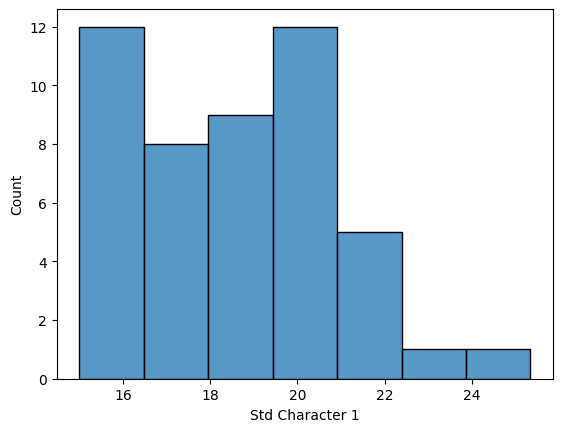

In [ ]:
sns.histplot(pdf_all_character_pairs.drop_duplicates(subset = ['Character 1' , 'Std Character 1']), x = 'Std Character 1')

# Heatmap

Character,Aether,Albedo,Alhaitham,Aloy,Amber,Ayaka,Ayato,Baizhu,Barbara,Beidou,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
Responder,,,,,,,,,,,,,,,,,,,,,
Alice,68,15,9,67,55,69,64,33,65,6,...,47,24,21,57,49,32,36,52,3,2
Amethyst,40,42,32,64,33,39,47,35,49,13,...,51,24,34,1,15,37,4,22,38,53
Amy,57,9,15,68,43,28,16,32,46,10,...,5,36,67,26,51,45,21,29,35,7
Chloe,12,24,23,66,54,37,36,53,63,10,...,3,21,20,68,45,58,18,35,56,8
David,69,35,33,67,23,49,45,32,63,16,...,20,52,8,40,57,46,26,13,38,5
Erin,43,66,49,58,57,32,34,6,9,44,...,23,30,5,48,53,19,38,24,40,12
FrOzEn,54,6,17,69,51,18,19,2,22,53,...,41,25,64,10,26,27,16,33,1,48
Hiro,12,15,4,59,63,64,24,13,38,26,...,1,14,39,68,49,44,33,57,35,6
Jason,38,30,13,68,32,42,12,50,46,18,...,19,47,59,14,36,41,17,33,9,1


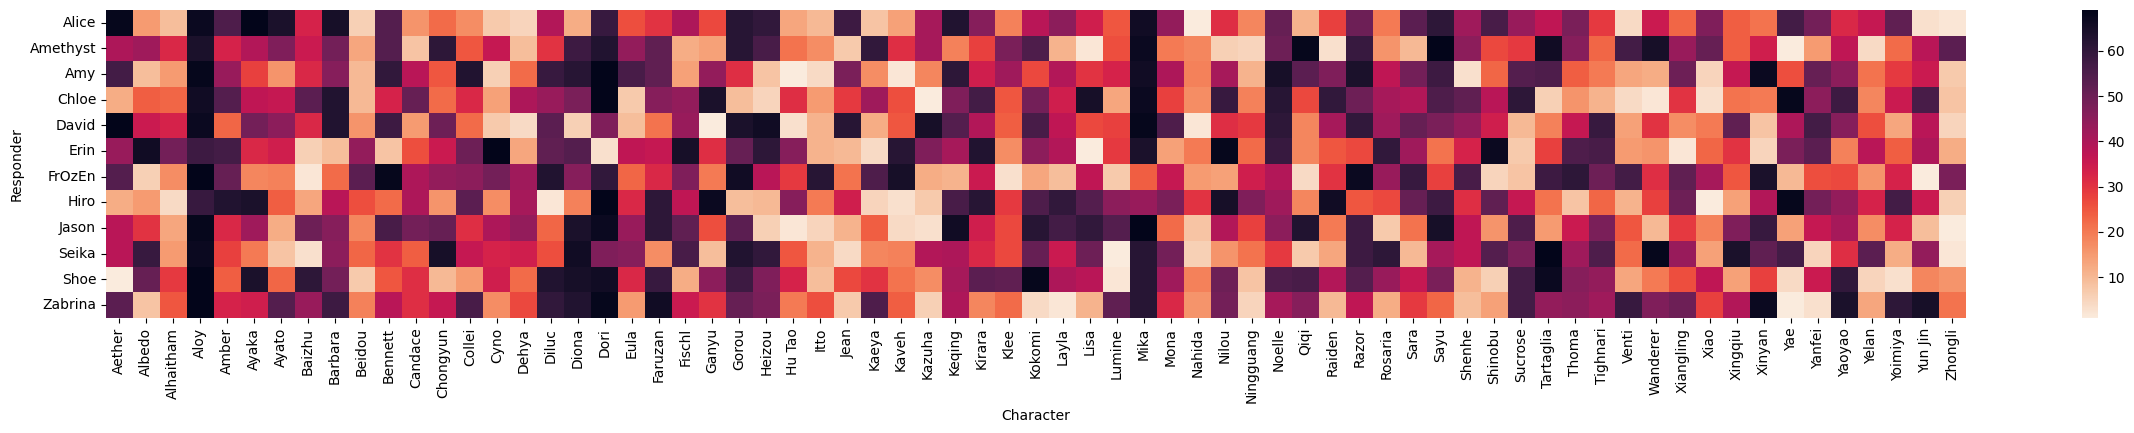

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(30, 4)

pdf_rank_heatmap = pdf_rank_all_long.copy()
pdf_rank_heatmap = pdf_rank_heatmap.drop(columns = ['Grade', 'Points', 'Borda'])
pdf_rank_heatmap = pdf_rank_heatmap.pivot(index='Responder', columns='Character', values='Rank')

ax = sns.heatmap(pdf_rank_heatmap, cmap = sns.cm.rocket_r)
pdf_rank_heatmap

Character,Aether,Albedo,Alhaitham,Aloy,Amber,Ayaka,Ayato,Baizhu,Barbara,Beidou,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
Responder,,,,,,,,,,,,,,,,,,,,,
Alice,1,3,4,1,1,1,1,2,1,4,...,1,3,3,1,1,2,2,1,4,5
Amethyst,1,1,2,1,2,2,1,2,1,3,...,1,3,2,5,3,2,5,3,2,1
Amy,1,5,4,1,2,3,4,2,2,4,...,5,2,1,3,2,2,3,3,2,5
Chloe,4,4,4,1,2,3,3,2,1,4,...,5,4,4,1,3,2,4,3,2,5
David,1,3,3,1,3,2,3,3,1,4,...,3,2,4,3,2,3,3,4,3,4
Erin,2,1,2,1,1,3,3,4,4,2,...,4,3,4,2,2,4,3,4,3,4
FrOzEn,2,5,4,1,2,4,4,5,4,2,...,3,4,1,5,4,4,4,3,5,3
Hiro,4,4,5,1,1,1,4,4,2,3,...,5,4,2,1,2,2,3,1,3,5
Jason,2,2,4,1,2,2,4,1,1,3,...,3,1,1,4,2,2,3,2,4,5


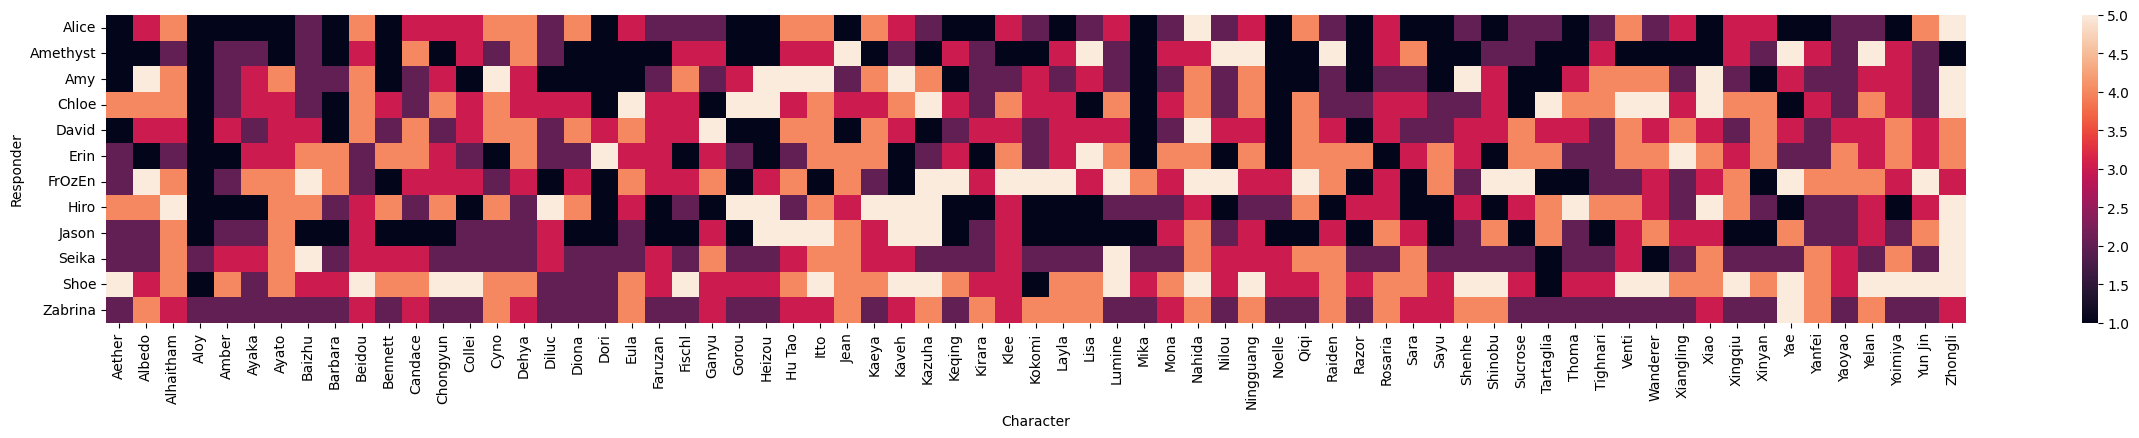

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(30, 4)

pdf_rank_heatmap = pdf_rank_all_long.copy()
pdf_rank_heatmap = pdf_rank_heatmap.drop(columns = ['Grade', 'Rank', 'Borda'])
pdf_rank_heatmap = pdf_rank_heatmap.pivot(index='Responder', columns='Character', values='Points')

ax = sns.heatmap(pdf_rank_heatmap, cmap = sns.cm.rocket)
pdf_rank_heatmap

<Figure size 640x480 with 0 Axes>

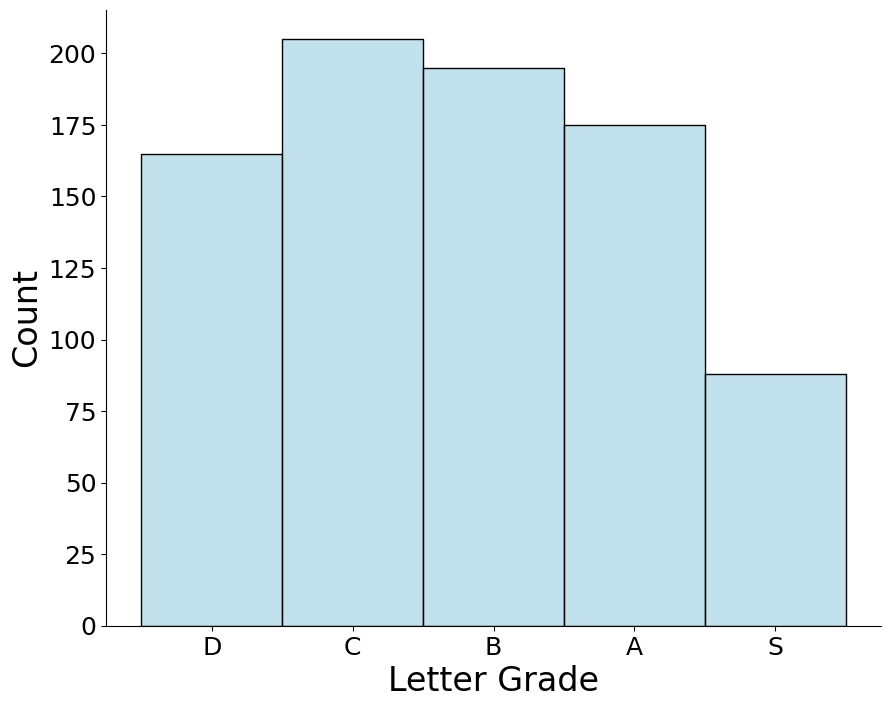

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

pdf_rank_all_long['Grade'] = pd.Categorical(pdf_rank_all_long['Grade'], ['D','C','B','A', 'S'])
sns.histplot(pdf_rank_all_long, x = 'Grade', color = 'lightblue')

#plt.ylim([1, 5])
#plt.yticks(np.arange(1, 6), ('D', 'C', 'B', 'A', 'S'))
plt.xlabel('Letter Grade', size = 24)
plt.ylabel('Count', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

# New Section

# By attribute

In [ ]:
def ConvertUnitReleasePatchToBase(unit_release_patch):
  if unit_release_patch == 'nan':
    return 'nan'
  elif unit_release_patch == '':
    return ''
  elif unit_release_patch == '1.0':
    return '0.0'
  else:
    return f'{unit_release_patch[0]}.0'

In [ ]:
pdf_meta_edit = pdf_meta_raw.iloc[:, :14]
pdf_meta_edit = pdf_meta_edit.rename(columns = {'Name' : 'Character'})
pdf_meta_edit['First Appears'] = pdf_meta_edit['First Appears'].astype(str)
pdf_meta_edit['Last Appears'] = pdf_meta_edit['Last Appears'].astype(str)
pdf_meta_edit['Unit Release Patch'] = pdf_meta_edit['Unit Release Patch'].astype(str)
pdf_meta_edit['Unit Release Block'] = pdf_meta_edit['Unit Release Patch'].apply(ConvertUnitReleasePatchToBase)
pdf_meta_edit

,Character,Body Type,Height,Gender,Affiliated Area,Vision,Skin Color,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year,Unit Release Block
0,Aether,Short Male,Short,Male,Outlander,Unknown,Light,5,Outlander,1.0,3.8,NaN,nan,2020,nan
1,Albedo,Short Male,Short,Male,Mondstadt,Geo,Light,5,Limited 5*,1.2,3.8,9.0,1.2,2020,1.0
2,Alhaitham,Tall Male,Tall,Male,Sumeru,Dendro,Light,5,Limited 5*,3.0,3.7,7.0,3.4,2023,3.0
3,Aloy,Short Female,Short,Female,Outlander,Cryo,Light,5,Outlander,nan,nan,NaN,nan,2021,nan
4,Amber,Short Female,Short,Female,Mondstadt,Pyro,Light,4,4*,1.0,3.7,10.0,1.0,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Yaoyao,Child,Child,Female,Liyue,Dendro,Light,4,4*,3.4,3.4,1.0,3.4,2023,3.0
65,Yelan,Tall Female,Tall,Female,Liyue,Hydro,Light,5,Limited 5*,2.7,3.4,4.0,2.7,2022,2.0
66,Yoimiya,Short Female,Short,Female,Inazuma,Pyro,Light,5,Limited 5*,2.0,3.7,7.0,2.0,2021,2.0
67,Yun Jin,Short Female,Short,Female,Liyue,Geo,Light,4,4*,2.4,3.4,6.0,2.4,2022,2.0


In [ ]:
pdf_rank_meta_merge = pdf_rank_all_long.merge(pdf_meta_edit, on = ['Character'], how = 'left')
# pdf_rank_meta_merge = pdf_rank_all_long_agg.merge(pdf_meta_edit, on = ['Character'], how = 'left')
pdf_rank_meta_merge

,Character,Responder,Rank,Grade,Points,Borda,Body Type,Height,Gender,Affiliated Area,Vision,Skin Color,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year,Unit Release Block
0,Aether,David,69,D,1,0,Short Male,Short,Male,Outlander,Unknown,Light,5,Outlander,1.0,3.8,NaN,nan,2020,nan
1,Albedo,David,35,B,3,34,Short Male,Short,Male,Mondstadt,Geo,Light,5,Limited 5*,1.2,3.8,9.0,1.2,2020,1.0
2,Alhaitham,David,33,B,3,36,Tall Male,Tall,Male,Sumeru,Dendro,Light,5,Limited 5*,3.0,3.7,7.0,3.4,2023,3.0
3,Aloy,David,67,D,1,2,Short Female,Short,Female,Outlander,Cryo,Light,5,Outlander,nan,nan,NaN,nan,2021,nan
4,Amber,David,23,B,3,46,Short Female,Short,Female,Mondstadt,Pyro,Light,4,4*,1.0,3.7,10.0,1.0,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Yaoyao,Erin,19,A,4,50,Child,Child,Female,Liyue,Dendro,Light,4,4*,3.4,3.4,1.0,3.4,2023,3.0
824,Yelan,Erin,38,B,3,31,Tall Female,Tall,Female,Liyue,Hydro,Light,5,Limited 5*,2.7,3.4,4.0,2.7,2022,2.0
825,Yoimiya,Erin,24,A,4,45,Short Female,Short,Female,Inazuma,Pyro,Light,5,Limited 5*,2.0,3.7,7.0,2.0,2021,2.0
826,Yun Jin,Erin,40,B,3,29,Short Female,Short,Female,Liyue,Geo,Light,4,4*,2.4,3.4,6.0,2.4,2022,2.0


In [ ]:
pdf_rank_agg_meta_merge = pdf_rank_all_long_agg.copy()
pdf_rank_agg_meta_merge = pdf_rank_agg_meta_merge[['Character', ('Points', 'mean')]]
pdf_rank_agg_meta_merge = pdf_rank_agg_meta_merge.rename(columns = {('Points', 'mean') : 'Points'})
pdf_rank_agg_meta_merge = pdf_rank_agg_meta_merge.merge(pdf_meta_edit, on = ['Character'], how = 'left')

pdf_rank_agg_meta_merge

,Character,Points,Body Type,Height,Gender,Affiliated Area,Vision,Skin Color,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year,Unit Release Block
0,Nahida,4.166667,Child,Child,Female,Sumeru,Dendro,Light,5,Limited 5*,2.8,3.6,9.0,3.2,2022,3.0
1,Zhongli,4.166667,Tall Male,Tall,Male,Liyue,Geo,Light,5,Limited 5*,1.0,3.4,9.0,1.1,2020,1.0
2,Itto,3.833333,Tall Male,Tall,Male,Inazuma,Geo,Light,5,Limited 5*,2.3,3.7,9.0,2.3,2021,2.0
3,Beidou,3.333333,Tall Female,Tall,Female,Liyue,Electro,Light,4,4*,1.6,3.4,9.0,1.0,2020,0.0
4,Ningguang,3.583333,Tall Female,Tall,Female,Liyue,Geo,Light,4,4*,1.0,3.7,9.0,1.0,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Noelle,1.666667,Short Female,Short,Female,Mondstadt,Geo,Light,4,4*,1.4,3.5,5.0,1.0,2020,0.0
65,Razor,1.833333,Short Male,Short,Male,Mondstadt,Electro,Light,4,4*,1.0,3.5,6.0,1.0,2020,0.0
66,Dori,1.750000,Child,Child,Female,Sumeru,Electro,Light,4,4*,3.0,3.7,5.0,3.0,2022,3.0
67,Mika,1.666667,Short Male,Short,Male,Mondstadt,Cryo,Light,4,4*,3.1,3.7,3.0,3.5,2023,3.0


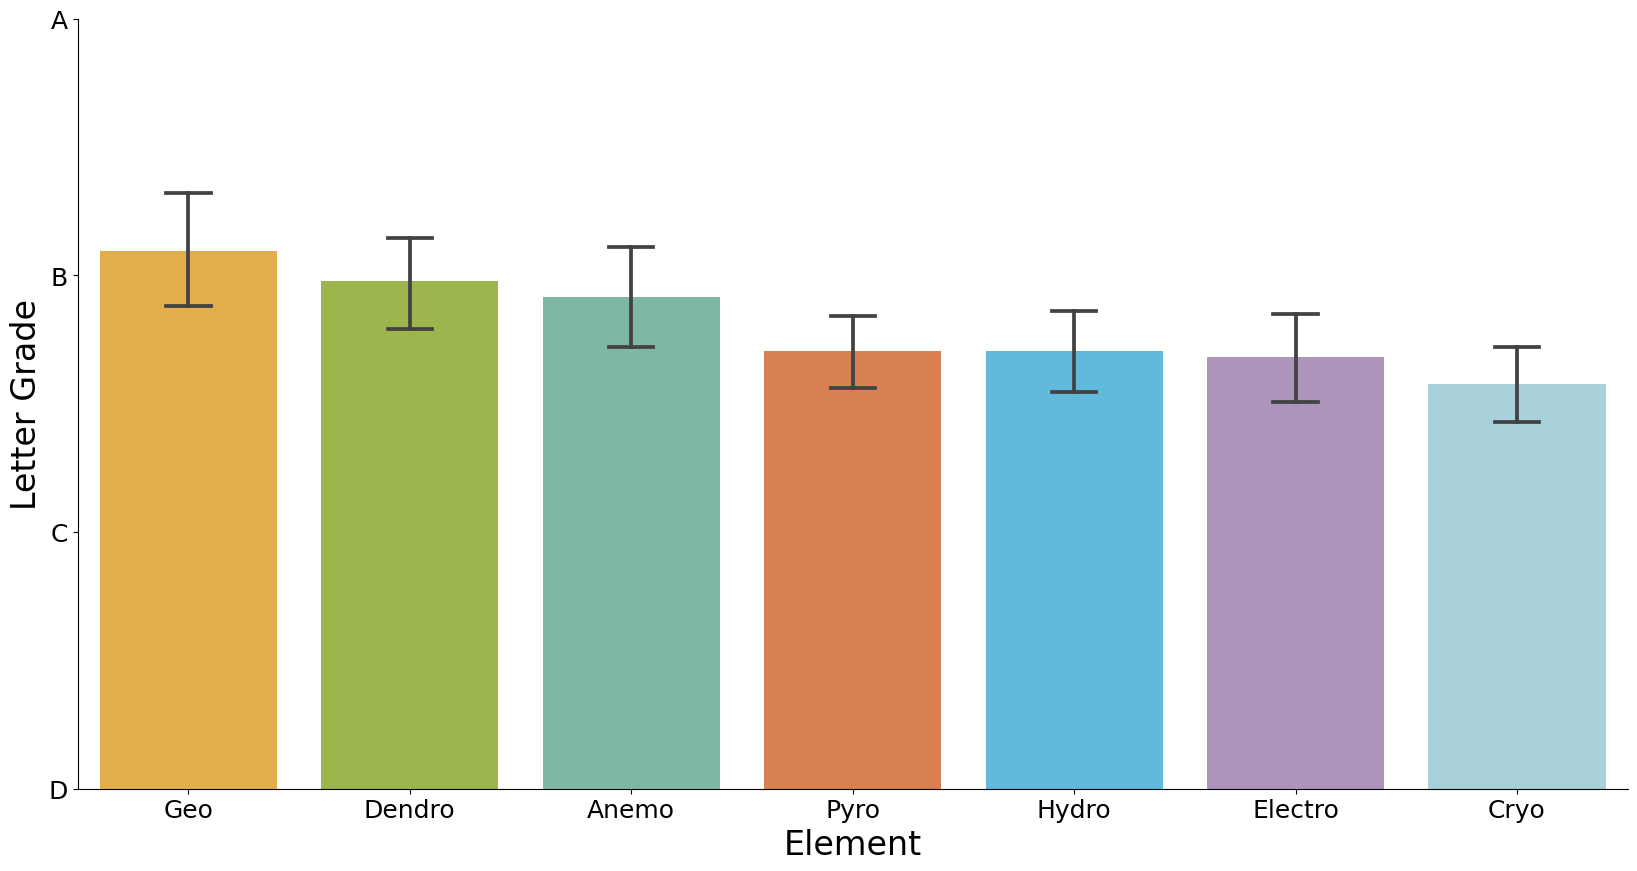

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(20, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Vision'] != 'Unknown'
]
list_order = ['Geo', 'Dendro', 'Anemo', 'Pyro', 'Hydro', 'Electro', 'Cryo']
ax = sns.barplot(pdf_rank_meta_filt, x="Vision", y='Points',
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=[genshincolor_dict['Geo'], genshincolor_dict['Dendro'], genshincolor_dict['Anemo'], genshincolor_dict['Pyro'], genshincolor_dict['Hydro'], genshincolor_dict['Electro'], genshincolor_dict['Cryo']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Element', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
pdf_rank_meta_filt['Vision'].unique()

array(['Geo', 'Dendro', 'Cryo', 'Pyro', 'Hydro', 'Electro', 'Anemo'],
      dtype=object)

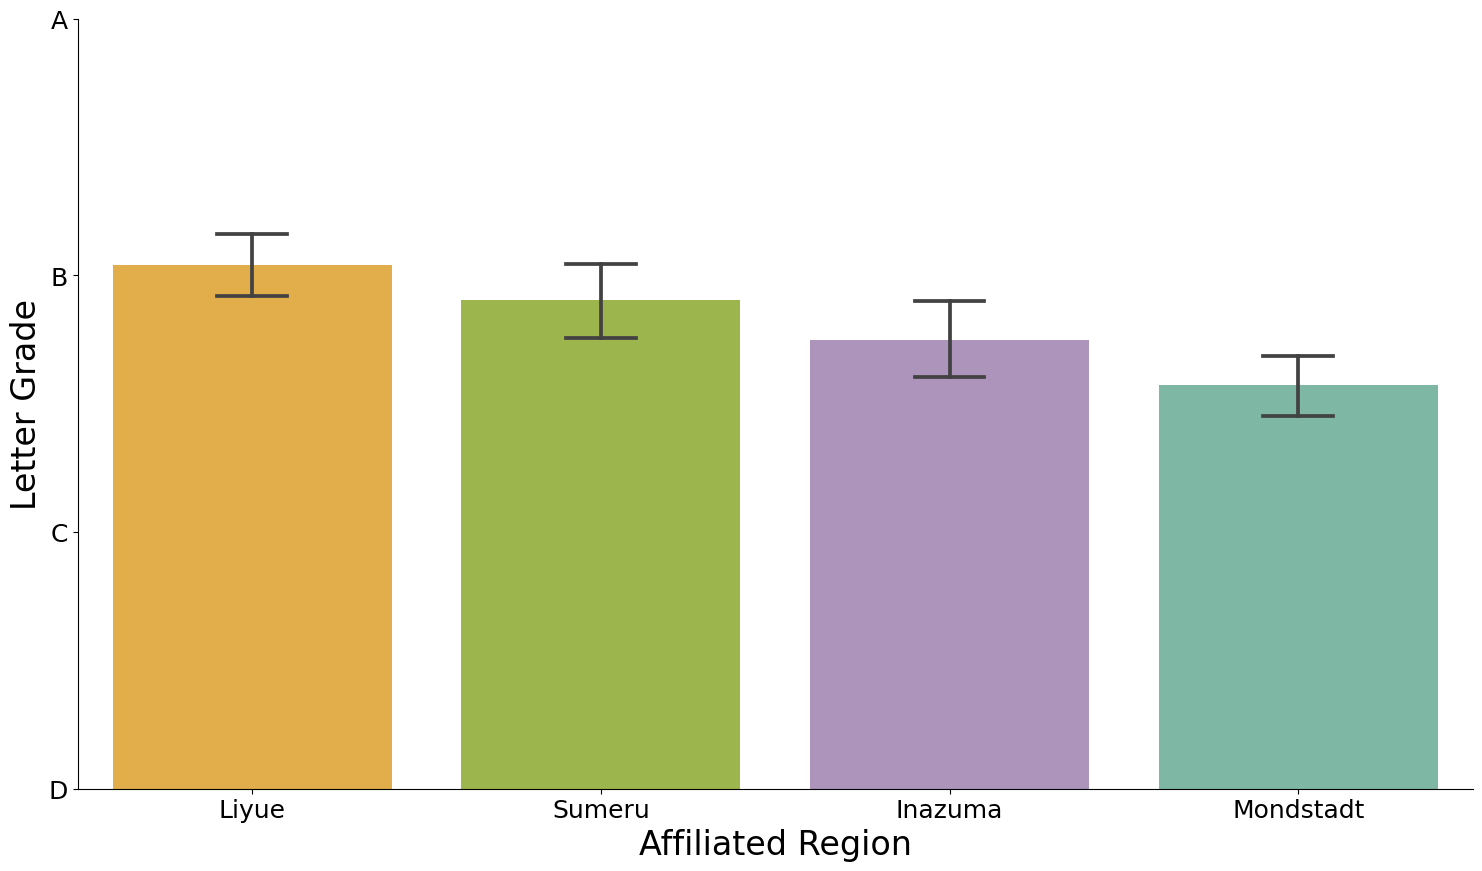

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    (pdf_rank_meta_merge['Affiliated Area'] != 'Outlander') &
    (pdf_rank_meta_merge['Affiliated Area'] != 'Snezhnaya')
]
list_order = ['Liyue', 'Sumeru', 'Inazuma', 'Mondstadt']
ax = sns.barplot(pdf_rank_meta_filt, x="Affiliated Area", y='Points',
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=[genshincolor_dict['Geo'], genshincolor_dict['Dendro'], genshincolor_dict['Electro'], genshincolor_dict['Anemo']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Affiliated Region', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

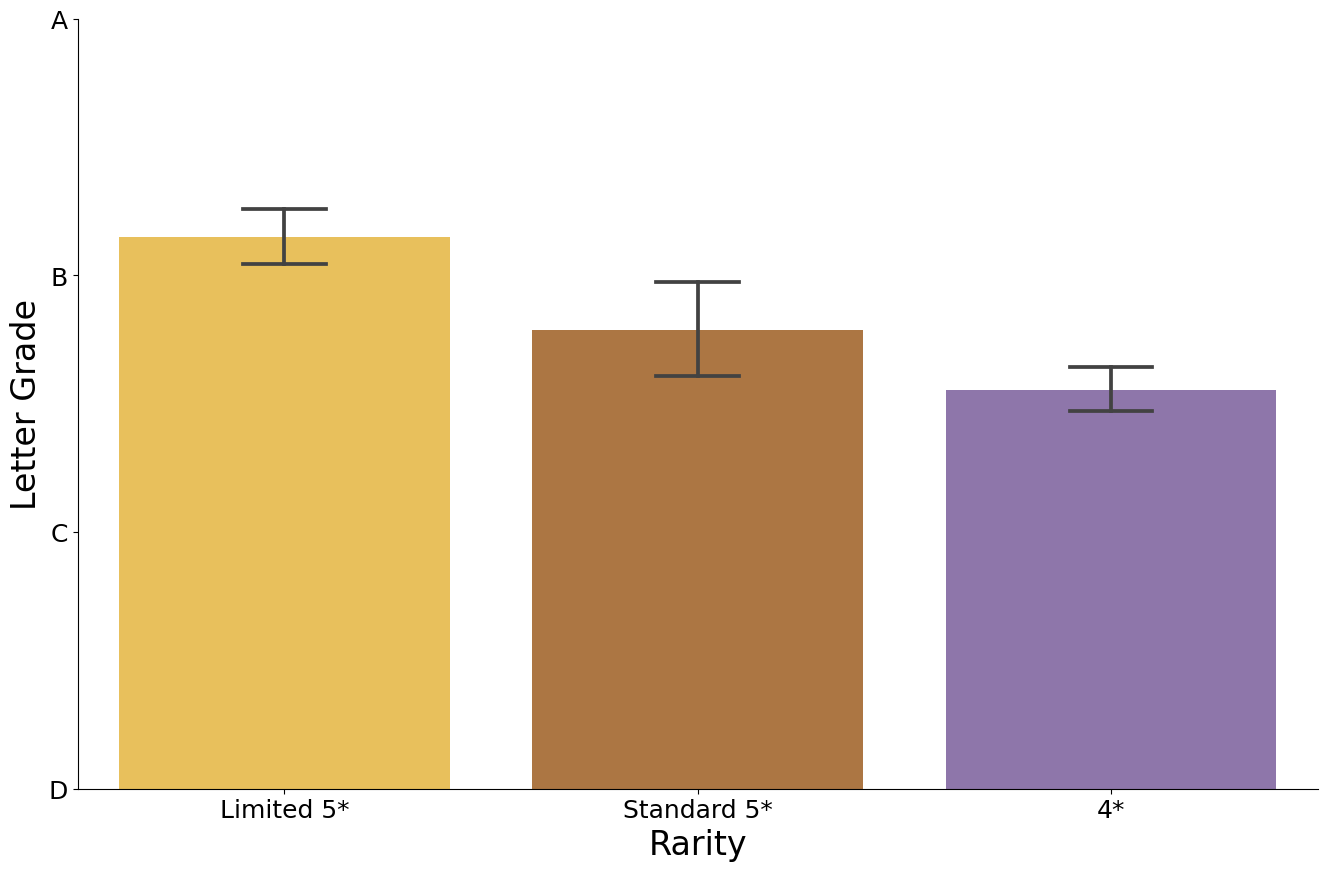

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(16, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Rarity 2'] != 'Outlander'
]
list_order = ['Limited 5*', 'Standard 5*', '4*']
ax = sns.barplot(pdf_rank_meta_filt, x="Rarity 2", y="Points",
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=[genshincolor_dict['5star'], genshincolor_dict['5star_standard'], genshincolor_dict['4star']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Rarity', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

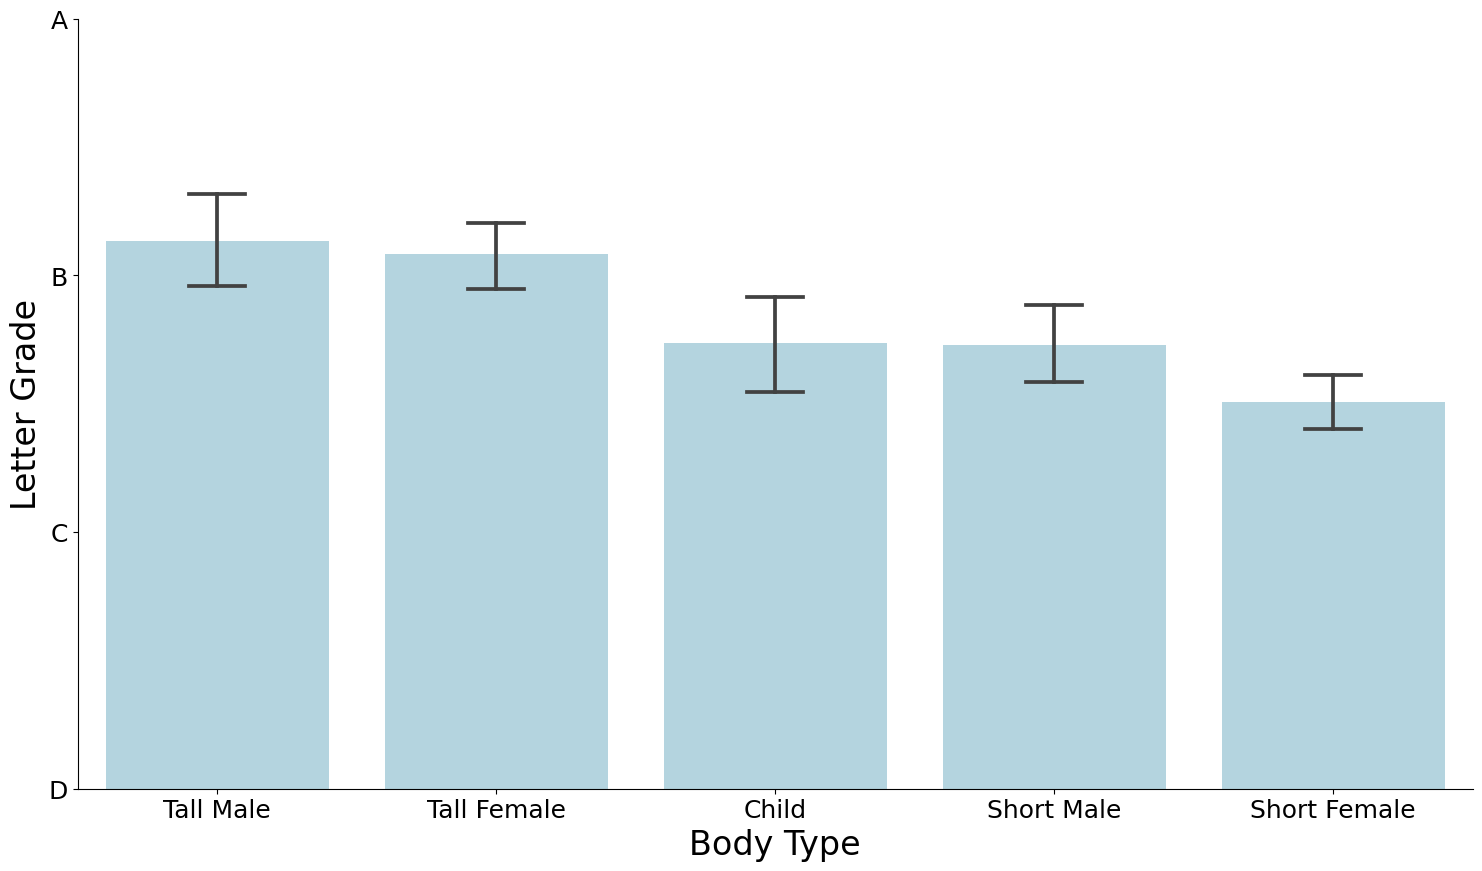

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18, 10)

list_order = ['Tall Male', 'Tall Female', 'Child', 'Short Male', 'Short Female']
ax = sns.barplot(pdf_rank_meta_merge, x="Body Type", y="Points", estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order, color = 'lightblue')
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Body Type', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

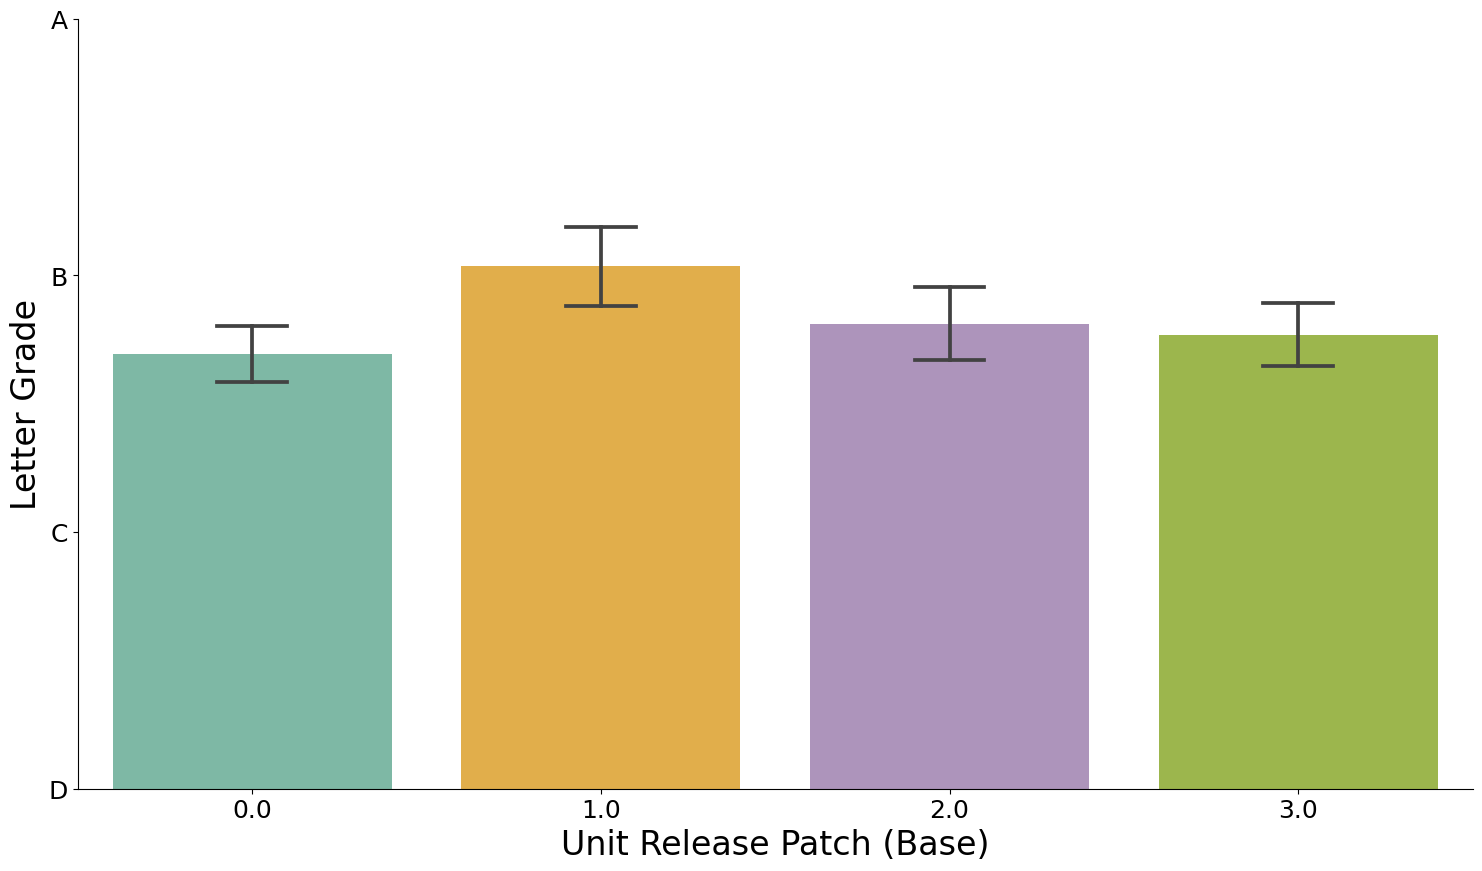

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Unit Release Block'].isin(['0.0', '1.0', '2.0', '3.0', '4.0'])
]

list_order = ['0.0', '1.0', '2.0', '3.0']
ax = sns.barplot(
    pdf_rank_meta_filt, x="Unit Release Block", y="Points",
    estimator=np.mean, errorbar=('ci', 85), capsize=.2,
    order = list_order,
    palette=[genshincolor_dict['Anemo'], genshincolor_dict['Geo'], genshincolor_dict['Electro'], genshincolor_dict['Dendro']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Unit Release Patch (Base)', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
unique_patches = list(pdf_rank_agg_meta_merge['Unit Release Patch']) + list(pdf_rank_agg_meta_merge['First Appears']) + list(pdf_rank_agg_meta_merge['Last Appears'])
unique_patches = list(set(unique_patches))
unique_patches.remove('nan')
# unique_patches.remove('0.0')
unique_patches.sort()
unique_patches

['1.0',
 '1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.6',
 '2.0',
 '2.1',
 '2.2',
 '2.3',
 '2.4',
 '2.5',
 '2.6',
 '2.7',
 '2.8',
 '3.0',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8']

In [ ]:
pdf_rank_meta_filt_release = pdf_rank_agg_meta_merge[
    pdf_rank_agg_meta_merge['Unit Release Patch'] != 'nan'
].groupby('Unit Release Patch').agg({'Points': ['mean', 'std']})
pdf_rank_meta_filt_release.columns = pdf_rank_meta_filt_release.columns.to_flat_index()
pdf_rank_meta_filt_release = pdf_rank_meta_filt_release.reset_index()
pdf_rank_meta_filt_release[('Points', 'std')] = pdf_rank_meta_filt_release[('Points', 'std')].fillna(0)
pdf_rank_meta_filt_release = pdf_rank_meta_filt_release.sort_values(by = 'Unit Release Patch').reset_index(drop = True)

pdf_rank_meta_filt_firstseen = pdf_rank_agg_meta_merge[
    (pdf_rank_agg_meta_merge['First Appears'] != 'nan') & (pdf_rank_agg_meta_merge['First Appears'] != '0.0')
].groupby('First Appears').agg({'Points': ['mean', 'std']})
pdf_rank_meta_filt_firstseen.columns = pdf_rank_meta_filt_firstseen.columns.to_flat_index()
pdf_rank_meta_filt_firstseen = pdf_rank_meta_filt_firstseen.reset_index()
pdf_rank_meta_filt_firstseen[('Points', 'std')] = pdf_rank_meta_filt_firstseen[('Points', 'std')].fillna(0)
pdf_rank_meta_filt_firstseen = pdf_rank_meta_filt_firstseen.sort_values(by = 'First Appears').reset_index(drop = True)

pdf_rank_meta_filt_lastseen = pdf_rank_agg_meta_merge[
    (pdf_rank_agg_meta_merge['Last Appears'] != 'nan') & (pdf_rank_agg_meta_merge['Last Appears'] != '0.0')
].groupby('Last Appears').agg({'Points': ['mean', 'std']})
pdf_rank_meta_filt_lastseen.columns = pdf_rank_meta_filt_lastseen.columns.to_flat_index()
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.reset_index()
pdf_rank_meta_filt_lastseen[('Points', 'std')] = pdf_rank_meta_filt_lastseen[('Points', 'std')].fillna(0)
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.sort_values(by = 'Last Appears').reset_index(drop = True)

pdf_rank_meta_filt_lastseen

,Last Appears,"(Points, mean)","(Points, std)"
0,3.2,2.416667,0.000000
1,3.3,2.600000,0.383695
2,3.4,3.025000,0.500077
3,3.5,2.430556,0.661263
4,3.6,3.025000,0.519749
5,3.7,2.807971,0.601678
6,3.8,2.724359,0.444077


<Figure size 640x480 with 0 Axes>

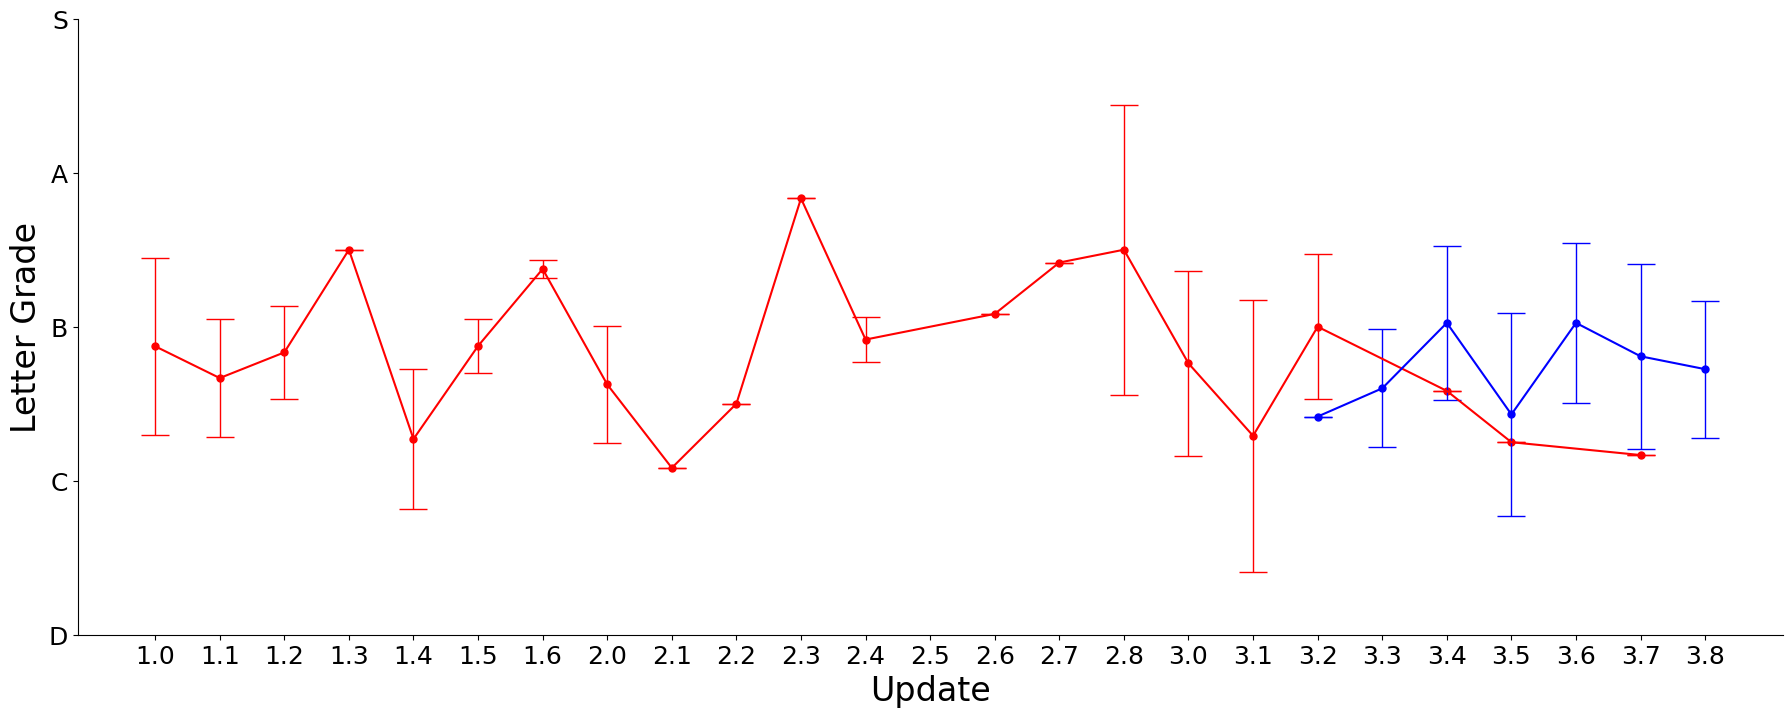

In [ ]:
plt.figure()
# fig = plt.gcf()
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)

plt.plot(unique_patches, [0] * len(unique_patches), 'k-')

# plt.errorbar(
#     pdf_rank_meta_filt_release['Unit Release Patch'],
#     pdf_rank_meta_filt_release[('Points', 'mean')],
#     yerr = pdf_rank_meta_filt_release[('Points', 'std')],
#     capsize=10, elinewidth=1, color = 'black'
# )
# plt.plot(
#     pdf_rank_meta_filt_release['Unit Release Patch'],
#     pdf_rank_meta_filt_release[('Points', 'mean')],
#     'k.', markersize = 10
# )

plt.errorbar(
    pdf_rank_meta_filt_firstseen['First Appears'],
    pdf_rank_meta_filt_firstseen[('Points', 'mean')],
    yerr = pdf_rank_meta_filt_firstseen[('Points', 'std')],
    capsize=10, elinewidth=1, color = 'red'
)
plt.plot(
    pdf_rank_meta_filt_firstseen['First Appears'],
    pdf_rank_meta_filt_firstseen[('Points', 'mean')],
    'r.', markersize = 10
)

plt.errorbar(
    pdf_rank_meta_filt_lastseen['Last Appears'],
    pdf_rank_meta_filt_lastseen[('Points', 'mean')],
    yerr = pdf_rank_meta_filt_lastseen[('Points', 'std')],
    capsize=10, elinewidth=1, color = 'blue'
)
plt.plot(
    pdf_rank_meta_filt_lastseen['Last Appears'],
    pdf_rank_meta_filt_lastseen[('Points', 'mean')],
    'b.', markersize = 10
)

plt.ylim([1, 5])
plt.yticks(np.arange(1, 6), ('D', 'C', 'B', 'A', 'S'))
plt.xlabel('Update', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

<Figure size 640x480 with 0 Axes>

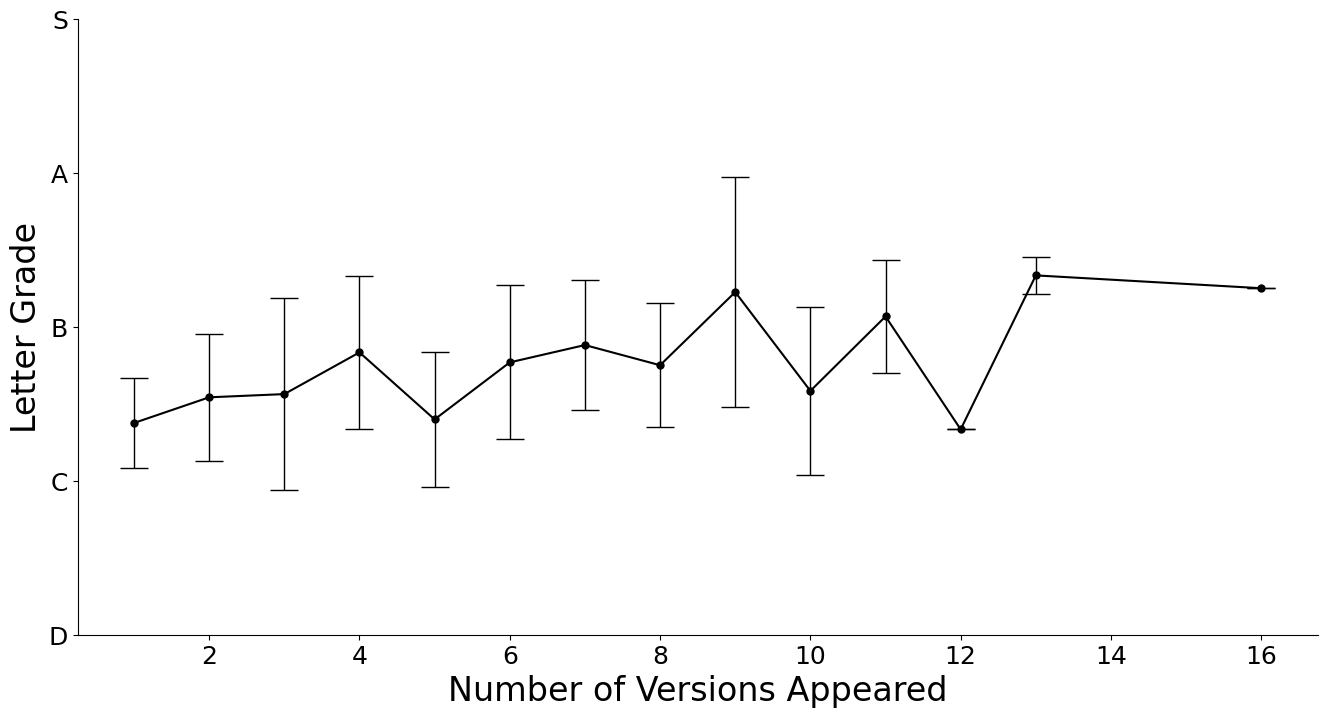

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

pdf_rank_meta_filt_numappear = pdf_rank_agg_meta_merge[
    pdf_rank_agg_meta_merge['Num Appearances'].notnull()
].groupby('Num Appearances').agg({'Points': ['mean', 'std']})
pdf_rank_meta_filt_numappear.columns = pdf_rank_meta_filt_numappear.columns.to_flat_index()
pdf_rank_meta_filt_numappear = pdf_rank_meta_filt_numappear.reset_index()
pdf_rank_meta_filt_numappear[('Points', 'std')] = pdf_rank_meta_filt_numappear[('Points', 'std')].fillna(0)
pdf_rank_meta_filt_numappear = pdf_rank_meta_filt_numappear.sort_values(by = 'Num Appearances').reset_index(drop = True)



plt.errorbar(
    pdf_rank_meta_filt_numappear['Num Appearances'],
    pdf_rank_meta_filt_numappear[('Points', 'mean')],
    yerr = pdf_rank_meta_filt_numappear[('Points', 'std')],
    capsize=10, elinewidth=1, color = 'black'
)
plt.plot(
    pdf_rank_meta_filt_numappear['Num Appearances'],
    pdf_rank_meta_filt_numappear[('Points', 'mean')],
    'k.', markersize = 10
)

plt.ylim([1, 5])
plt.yticks(np.arange(1, 6), ('D', 'C', 'B', 'A', 'S'))
plt.xlabel('Number of Versions Appeared', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

<Axes: xlabel='Unit Release Patch', ylabel='Points'>

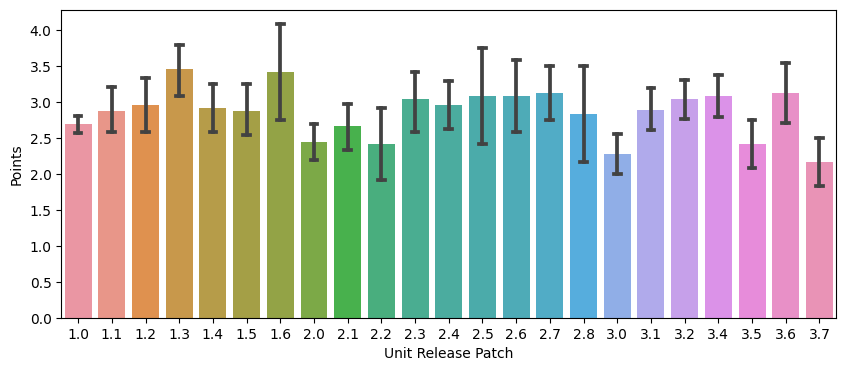

In [ ]:
pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Unit Release Patch'] != 'nan'
]
pdf_rank_meta_filt = pdf_rank_meta_filt.sort_values(by = ['Unit Release Patch']).reset_index(drop = True)

plt.figure()
fig = plt.gcf()
fig.set_size_inches(10, 4)
sns.barplot(pdf_rank_meta_filt, x="Unit Release Patch", y="Points", estimator=np.mean, errorbar=('ci', 85), capsize=.2)

<Axes: xlabel='Num Appearances', ylabel='Points'>

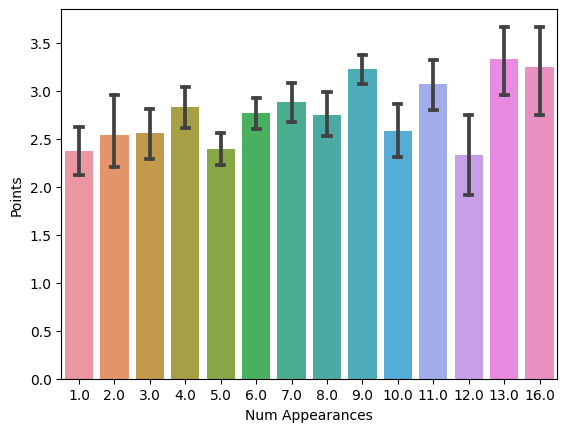

In [ ]:
pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Num Appearances'].notnull()
]
sns.barplot(pdf_rank_meta_filt, x="Num Appearances", y="Points", estimator=np.mean, errorbar=('ci', 85), capsize=.2)

<Axes: xlabel='Skin Color', ylabel='Points'>

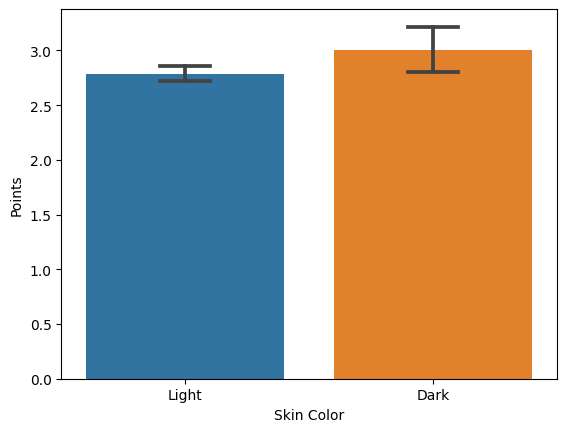

In [ ]:
sns.barplot(pdf_rank_meta_filt, x="Skin Color", y="Points", estimator=np.mean, errorbar=('ci', 85), capsize=.2)

# Participant trends

In [ ]:
pdf_rank_all_long_merge_agg = pdf_rank_all_long.merge(
    pdf_rank_all_long_agg.drop(columns = 'index'), on = 'Character', how = 'outer'
)
pdf_rank_all_long_merge_agg['Points__diff_from_mean'] = pdf_rank_all_long_merge_agg['Points'] - pdf_rank_all_long_merge_agg[('Points', 'mean')]
pdf_rank_all_long_merge_agg['Rank__diff_from_Borda'] = pdf_rank_all_long_merge_agg['Rank'] - pdf_rank_all_long_merge_agg['Borda Rank']
pdf_rank_all_long_merge_agg['Points__abs_diff_from_mean'] = np.abs(pdf_rank_all_long_merge_agg['Points'] - pdf_rank_all_long_merge_agg[('Points', 'mean')])
pdf_rank_all_long_merge_agg['Rank__abs_diff_from_Borda'] = np.abs(pdf_rank_all_long_merge_agg['Rank'] - pdf_rank_all_long_merge_agg['Borda Rank'])

pdf_rank_all_long_merge_agg

,Character,Responder,Rank,Grade,Points,Borda,"(Points, mean)","(Points, median)","(Points, std)","(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank,Points__diff_from_mean,Rank__diff_from_Borda,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda
0,Aether,David,69,D,1,0,2.250000,2.0,1.356801,343,40.416667,41.5,1,69,51,-1.250000,18,1.250000,18
1,Aether,Shoe,1,S,5,68,2.250000,2.0,1.356801,343,40.416667,41.5,1,69,51,2.750000,-50,2.750000,50
2,Aether,Jason,38,C,2,31,2.250000,2.0,1.356801,343,40.416667,41.5,1,69,51,-0.250000,-13,0.250000,13
3,Aether,Seika,38,C,2,31,2.250000,2.0,1.356801,343,40.416667,41.5,1,69,51,-0.250000,-13,0.250000,13
4,Aether,FrOzEn,54,C,2,15,2.250000,2.0,1.356801,343,40.416667,41.5,1,69,51,-0.250000,3,0.250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Zhongli,Hiro,6,S,5,63,4.166667,5.0,1.267304,647,15.083333,7.5,1,53,2,0.833333,4,0.833333,4
824,Zhongli,Amy,7,S,5,62,4.166667,5.0,1.267304,647,15.083333,7.5,1,53,2,0.833333,5,0.833333,5
825,Zhongli,Alice,2,S,5,67,4.166667,5.0,1.267304,647,15.083333,7.5,1,53,2,0.833333,0,0.833333,0
826,Zhongli,Zabrina,21,B,3,48,4.166667,5.0,1.267304,647,15.083333,7.5,1,53,2,-1.166667,19,1.166667,19


In [ ]:
def RescaleValueToRange(value, min_value, max_value):
  return (value - min_value) / (max_value - min_value)

In [ ]:
pdf_rank_agg_by_rater = pdf_rank_all_long_merge_agg.copy()
pdf_rank_agg_by_rater = pdf_rank_agg_by_rater.groupby('Responder').agg(
    {
        'Points' : 'mean',
        'Points__abs_diff_from_mean' : 'mean',
        'Rank__abs_diff_from_Borda' : 'mean',
    }
)
pdf_rank_agg_by_rater = pdf_rank_agg_by_rater.reset_index()
pdf_rank_agg_by_rater['Points_rescaled'] = pdf_rank_agg_by_rater['Points'].apply(lambda row : RescaleValueToRange(row, min(pdf_rank_agg_by_rater['Points']), max(pdf_rank_agg_by_rater['Points'])))
pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda_rescaled'] = pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda'].apply(lambda row : RescaleValueToRange(row, min(pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda']), max(pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda'])))
# pdf_rank_agg_by_rater.columns = pdf_rank_agg_by_rater.columns.to_flat_index()

display(pdf_rank_agg_by_rater)

,Responder,Points,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda,Points_rescaled,Rank__abs_diff_from_Borda_rescaled
0,Alice,2.231884,0.881643,12.724638,0.036036,0.130268
1,Amethyst,2.173913,1.173913,17.884058,0.000000,0.812261
2,Amy,2.623188,0.917874,11.739130,0.279279,0.000000
3,Chloe,3.101449,0.855072,15.072464,0.576577,0.440613
4,David,2.826087,0.673913,14.086957,0.405405,0.310345
5,Erin,2.884058,0.995169,19.275362,0.441441,0.996169
6,FrOzEn,3.173913,1.171498,19.304348,0.621622,1.000000
7,Hiro,2.739130,1.123188,18.260870,0.351351,0.862069
8,Jason,2.376812,0.961353,13.304348,0.126126,0.206897
9,Seika,2.681159,0.729469,16.869565,0.315315,0.678161


In [ ]:
pdf_rank_agg_by_rater_devs = pdf_rank_all_long_merge_agg.copy()
pdf_rank_agg_by_rater_devs = pdf_rank_agg_by_rater_devs.groupby('Responder').agg(
    {
        'Rank__diff_from_Borda' : ['min', 'max'],
    }
)
pdf_rank_agg_by_rater_devs.columns = pdf_rank_agg_by_rater_devs.columns.to_flat_index()
pdf_rank_agg_by_rater_devs = pdf_rank_agg_by_rater_devs.reset_index()

pdf_rank_agg_by_rater_devs = pdf_rank_agg_by_rater_devs.merge(pdf_rank_all_long_merge_agg, on = 'Responder', how = 'left')

pdf_rank_agg_by_rater_devs_better = pdf_rank_agg_by_rater_devs[
    pdf_rank_agg_by_rater_devs['Rank__diff_from_Borda'] == pdf_rank_agg_by_rater_devs[('Rank__diff_from_Borda', 'min')]
]

pdf_rank_agg_by_rater_devs_better

,Responder,"(Rank__diff_from_Borda, min)","(Rank__diff_from_Borda, max)",Character,Rank,Grade,Points,Borda,"(Points, mean)","(Points, median)",...,"(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank,Points__diff_from_mean,Rank__diff_from_Borda,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda
17,Alice,-50,43,Diona,12,A,4,57,2.416667,2.0,...,265,46.916667,56.0,6,66,62,1.583333,-50,1.583333,50
110,Amethyst,-43,51,Nilou,6,S,5,63,2.583333,2.0,...,359,39.083333,40.0,6,68,49,2.416667,-43,2.416667,43
162,Amy,-39,33,Heizou,8,S,5,61,2.833333,2.5,...,363,38.750000,47.5,5,66,47,2.166667,-39,2.166667,39
230,Chloe,-55,39,Gorou,9,S,5,60,2.250000,2.0,...,249,48.250000,55.5,9,66,64,2.750000,-55,2.750000,55
293,David,-56,53,Diona,6,A,4,63,2.416667,2.0,...,265,46.916667,56.0,6,66,62,1.583333,-56,1.583333,56
363,Erin,-64,53,Dori,3,S,5,66,1.750000,1.0,...,141,57.250000,64.5,3,69,67,3.250000,-64,3.250000,64
445,FrOzEn,-49,59,Keqing,11,S,5,58,2.333333,2.0,...,289,44.916667,44.0,11,66,60,2.666667,-49,2.666667,49
499,Hiro,-55,42,Diluc,2,S,5,67,2.333333,2.0,...,315,42.750000,47.5,2,63,57,2.666667,-55,2.666667,55
506,Hiro,-55,42,Gorou,9,S,5,60,2.250000,2.0,...,249,48.250000,55.5,9,66,64,2.750000,-55,2.750000,55
576,Jason,-41,40,Heizou,6,S,5,63,2.833333,2.5,...,363,38.750000,47.5,5,66,47,2.166667,-41,2.166667,41


In [ ]:
pdf_rank_agg_by_rater_devs_worse = pdf_rank_agg_by_rater_devs[
    pdf_rank_agg_by_rater_devs['Rank__diff_from_Borda'] == pdf_rank_agg_by_rater_devs[('Rank__diff_from_Borda', 'max')]
]

pdf_rank_agg_by_rater_devs_worse

,Responder,"(Rank__diff_from_Borda, min)","(Rank__diff_from_Borda, max)",Character,Rank,Grade,Points,Borda,"(Points, mean)","(Points, median)",...,"(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank,Points__diff_from_mean,Rank__diff_from_Borda,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda
27,Alice,-50,43,Jean,58,D,1,11,3.250000,4.0,...,510,26.500000,24.0,4,62,15,-2.250000,43,2.250000,43
137,Amethyst,-43,51,Zhongli,53,D,1,16,4.166667,5.0,...,647,15.083333,7.5,1,53,2,-3.166667,51,3.166667,51
157,Amy,-39,33,Eula,56,D,1,13,3.000000,3.0,...,458,30.833333,32.0,7,56,23,-2.000000,33,2.000000,33
165,Amy,-39,33,Jean,48,C,2,21,3.250000,4.0,...,510,26.500000,24.0,4,62,15,-1.250000,33,1.250000,33
229,Chloe,-55,39,Ganyu,64,D,1,5,2.833333,3.0,...,450,31.500000,28.5,1,67,25,-1.833333,39,1.833333,39
306,David,-56,53,Kazuha,65,D,1,4,3.416667,4.0,...,531,24.750000,17.5,1,65,12,-2.416667,53,2.416667,53
359,Erin,-64,53,Cyno,69,D,1,0,3.166667,4.0,...,499,27.416667,25.0,6,69,16,-2.166667,53,2.166667,53
440,FrOzEn,-49,59,Itto,62,D,1,7,3.833333,4.0,...,627,16.750000,11.0,4,62,3,-2.833333,59,2.833333,59
505,Hiro,-55,42,Ganyu,67,D,1,2,2.833333,3.0,...,450,31.500000,28.5,1,67,25,-1.833333,42,1.833333,42
525,Hiro,-55,42,Ningguang,47,C,2,22,3.583333,3.5,...,581,20.583333,20.0,5,47,5,-1.583333,42,1.583333,42


<Figure size 640x480 with 0 Axes>

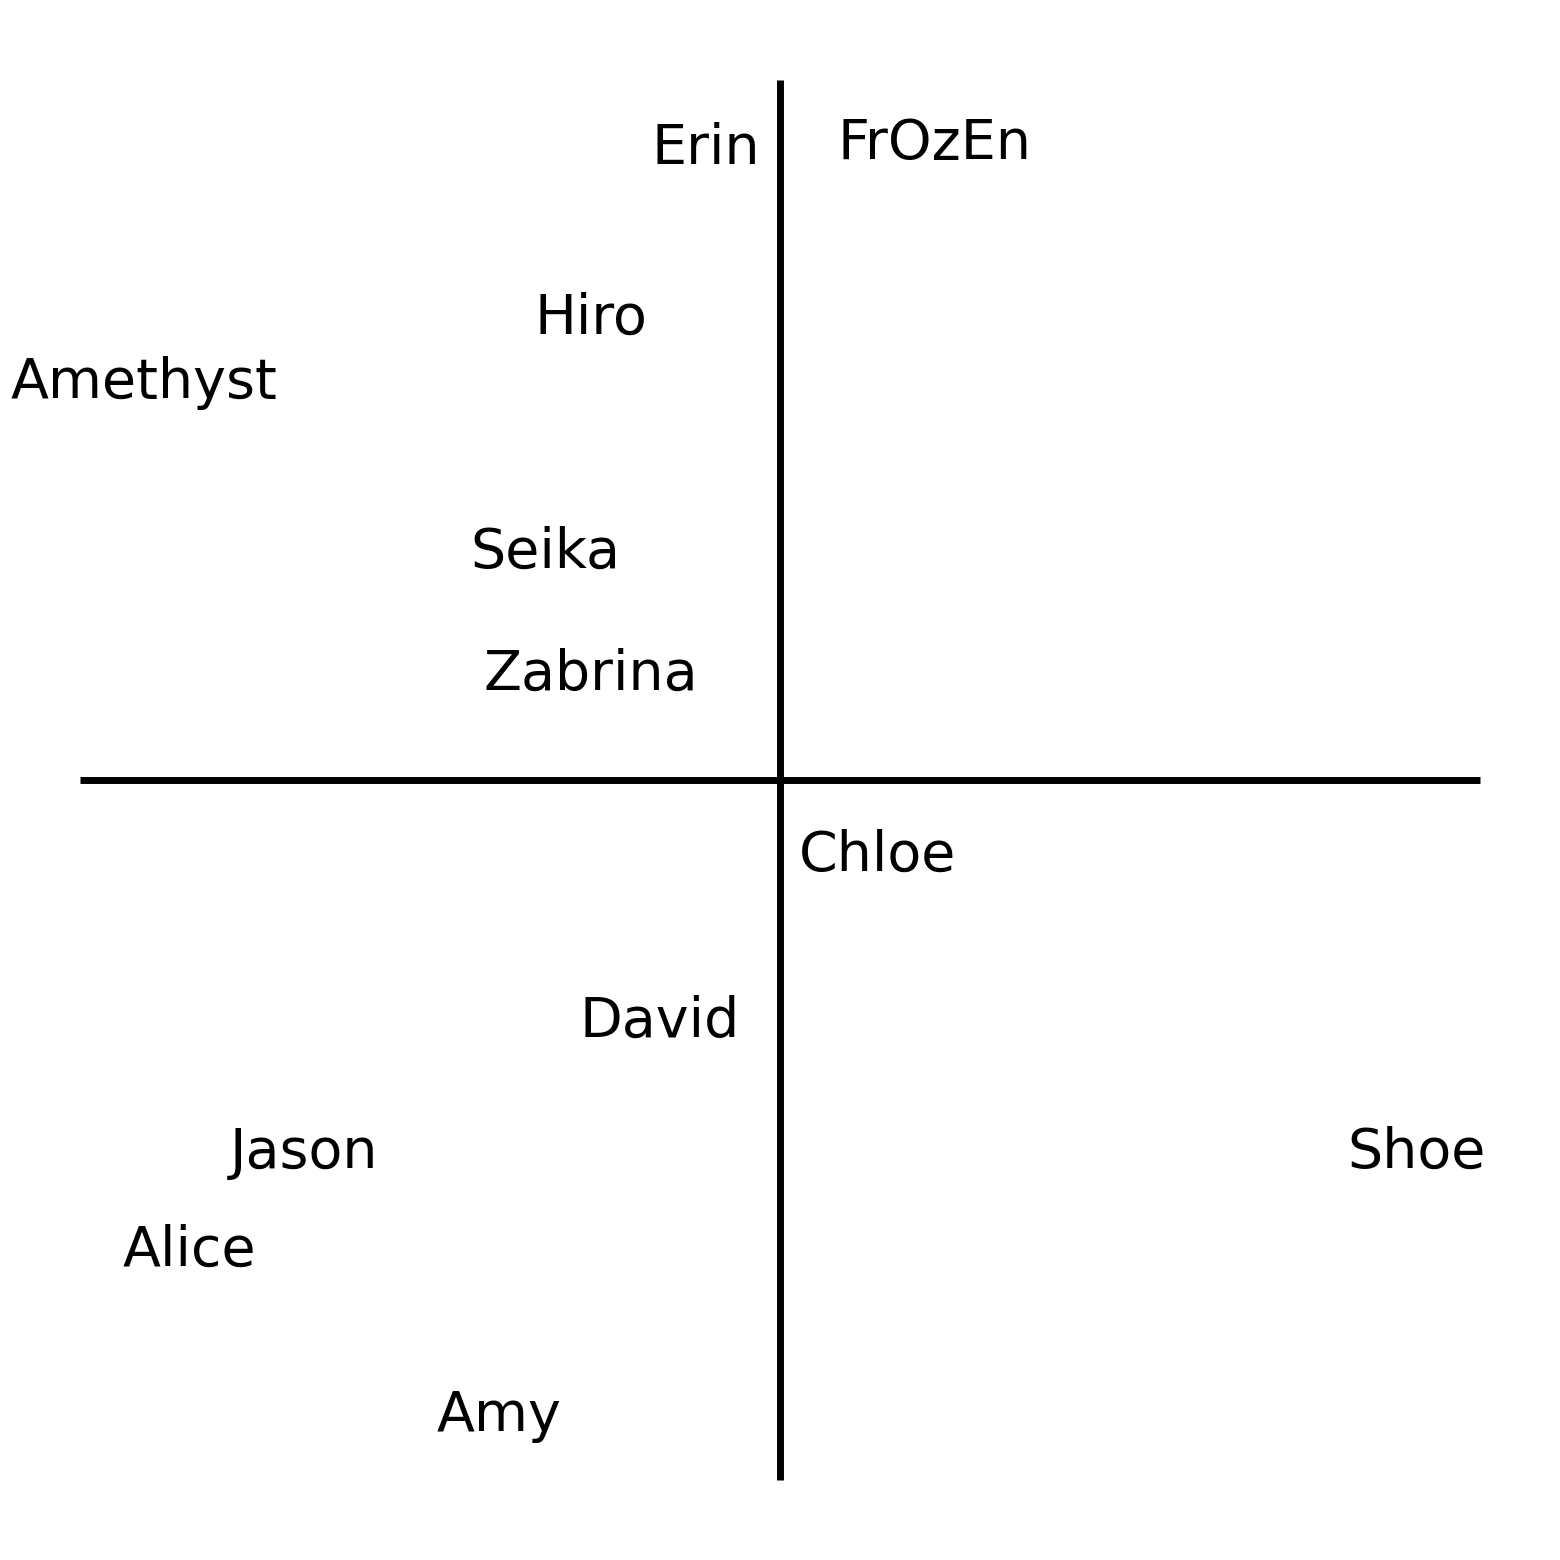

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

for curr_row_num in range(len(pdf_rank_agg_by_rater)):

  curr_row = pdf_rank_agg_by_rater.iloc[curr_row_num, :]
  plt.text(curr_row['Points_rescaled'], curr_row['Rank__abs_diff_from_Borda_rescaled'], curr_row['Responder'],
        size = 40,
        horizontalalignment='center',
        verticalalignment='center'
  )
  #print()

plt.hlines(0.5, -0.05, 1.05, linewidth = 5, color = 'black')
plt.vlines(0.5, -0.05, 1.05, linewidth = 5, color = 'black')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
ax.set_aspect('equal')
ax.axis('off')
plt.show()

# Taste similarity

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  responder_list = list(pdf_rank_all_long['Responder'].unique())
  responder_combinations = list(itertools.combinations(responder_list, 2))

  pdf_all_pairs = None

  for curr_pair in responder_combinations:

    curr_pair_dict = {}
    responder_1 = curr_pair[0]
    responder_2 = curr_pair[1]

    pdf_curr_pair = pdf_rank_all_wide[['Character', f'{responder_1} Rank', f'{responder_2} Rank']]
    pdf_curr_pair['Square Diff'] = (pdf_curr_pair[f'{responder_2} Rank'] - pdf_curr_pair[f'{responder_1} Rank'])**2
    curr_euc_distance = np.sqrt(np.sum(np.array(pdf_curr_pair['Square Diff'])))

    curr_pair_dict['Responder 1'] = [responder_1]
    curr_pair_dict['Responder 2'] = [responder_2]
    curr_pair_dict['Euclidean Distance'] = [curr_euc_distance]

    pdf_curr_pair = pd.DataFrame(curr_pair_dict)

    if pdf_all_pairs is None:
      pdf_all_pairs = pdf_curr_pair.copy()
    else:
      pdf_all_pairs = pd.concat([pdf_all_pairs, pdf_curr_pair], axis = 0)

pdf_all_pairs = pdf_all_pairs.reset_index(drop = True)
pdf_all_pairs

,Responder 1,Responder 2,Euclidean Distance
0,David,Shoe,204.846284
1,David,Jason,207.571674
2,David,Seika,193.473512
3,David,FrOzEn,229.943471
4,David,Amethyst,211.627030
...,...,...,...
61,Amy,Zabrina,177.234308
62,Amy,Erin,246.016260
63,Alice,Zabrina,219.212226
64,Alice,Erin,216.494804


In [ ]:
pdf_rank_all_wide

,Character,David Rank,David Grade,David Points,Shoe Rank,Shoe Grade,Shoe Points,Jason Rank,Jason Grade,Jason Points,...,Amy Points,Alice Rank,Alice Grade,Alice Points,Zabrina Rank,Zabrina Grade,Zabrina Points,Erin Rank,Erin Grade,Erin Points
0,Aether,69,D,1,1,S,5,38,C,2,...,1,68,D,1,53,C,2,43,C,2
1,Albedo,35,B,3,51,B,3,30,C,2,...,5,15,B,3,8,A,4,66,D,1
2,Alhaitham,33,B,3,29,A,4,13,A,4,...,4,9,A,4,25,B,3,49,C,2
3,Aloy,67,D,1,69,D,1,68,D,1,...,1,67,D,1,69,C,2,58,D,1
4,Amber,23,B,3,24,A,4,32,C,2,...,2,55,D,1,33,C,2,57,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Yaoyao,46,B,3,60,B,3,41,C,2,...,2,32,C,2,64,C,2,19,A,4
65,Yelan,26,B,3,5,S,5,17,B,3,...,3,36,C,2,13,A,4,38,B,3
66,Yoimiya,13,A,4,3,S,5,33,C,2,...,3,52,D,1,61,C,2,24,A,4
67,Yun Jin,38,B,3,18,S,5,9,A,4,...,2,3,A,4,65,C,2,40,B,3


# Clustering

In [ ]:
# import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pdf_rank_wide_char = pdf_rank_heatmap.copy()
pdf_rank_wide_char.columns = pdf_rank_wide_char.columns.to_flat_index()
pdf_rank_wide_char = pdf_rank_wide_char.reset_index()

pdf_rank_wide_char

Character,Responder,Aether,Albedo,Alhaitham,Aloy,Amber,Ayaka,Ayato,Baizhu,Barbara,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
0,Alice,1,3,4,1,1,1,1,2,1,...,1,3,3,1,1,2,2,1,4,5
1,Amethyst,1,1,2,1,2,2,1,2,1,...,1,3,2,5,3,2,5,3,2,1
2,Amy,1,5,4,1,2,3,4,2,2,...,5,2,1,3,2,2,3,3,2,5
3,Chloe,4,4,4,1,2,3,3,2,1,...,5,4,4,1,3,2,4,3,2,5
4,David,1,3,3,1,3,2,3,3,1,...,3,2,4,3,2,3,3,4,3,4
5,Erin,2,1,2,1,1,3,3,4,4,...,4,3,4,2,2,4,3,4,3,4
6,FrOzEn,2,5,4,1,2,4,4,5,4,...,3,4,1,5,4,4,4,3,5,3
7,Hiro,4,4,5,1,1,1,4,4,2,...,5,4,2,1,2,2,3,1,3,5
8,Jason,2,2,4,1,2,2,4,1,1,...,3,1,1,4,2,2,3,2,4,5
9,Seika,2,2,4,2,3,3,4,5,2,...,4,2,2,2,4,3,2,4,2,5


In [ ]:
# Separating out the features
x_feature_vals = pdf_rank_wide_char.loc[:, 'Aether':'Zhongli'].values
id_vals = pdf_rank_wide_char.loc[:, ['Responder']].values
id_vals

# # Standardizing the features
# x_feature_vals = StandardScaler().fit_transform(x_feature_vals)

# Run the PCA
pca = PCA(n_components=0.95, svd_solver='full')
princomps = pca.fit_transform(x_feature_vals)
princomps
pdf_rank_princomps = pd.DataFrame(data = np.concatenate((id_vals, princomps[:, :3]),axis=1), columns = ['Responder', 'pc1', 'pc2', 'pc3'])
pdf_rank_princomps

,Responder,pc1,pc2,pc3
0,Alice,1.579018,-4.548736,3.680156
1,Amethyst,-7.573842,-6.53602,-1.373844
2,Amy,4.252292,-2.385229,-4.256964
3,Chloe,5.97005,3.566339,-0.276064
4,David,-1.619814,-0.357415,3.177026
5,Erin,-2.776614,2.499706,7.809362
6,FrOzEn,-6.717868,5.435289,-2.891453
7,Hiro,9.178891,0.608013,1.569064
8,Jason,2.889537,-5.023739,-3.599448
9,Seika,-1.634779,-0.538242,2.042953


Text(0.5, 1.0, 'Projection, first 2 Principal Components')

<Figure size 640x480 with 0 Axes>

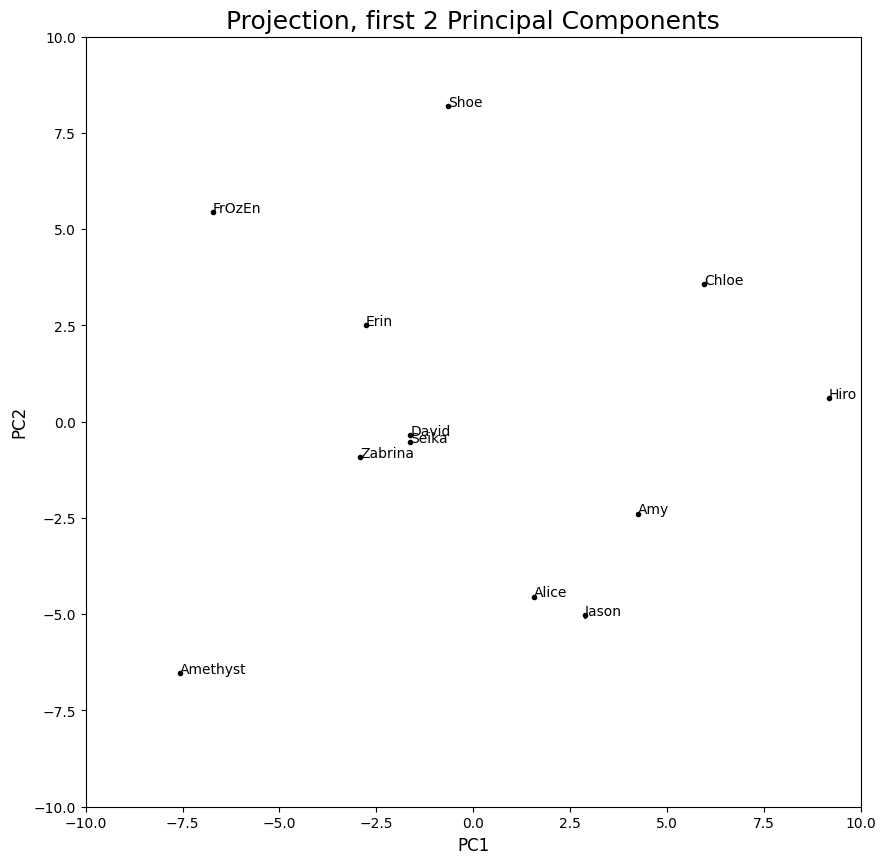

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# ax = plt.axes(projection='3d')

plt.plot(pdf_rank_princomps['pc1'], pdf_rank_princomps['pc2'], 'k.')
# ax.plot3D(pdf_rank_princomps['pc1'], pdf_rank_princomps['pc2'], pdf_rank_princomps['pc3'], 'k.');

for i in range(len(pdf_rank_princomps)):
    plt.annotate(pdf_rank_princomps['Responder'][i], (pdf_rank_princomps['pc1'][i], pdf_rank_princomps['pc2'][i]))

plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title('Projection, first 2 Principal Components', fontsize = 18)

In [ ]:
primcomp_components = np.transpose(pca.components_)
princomp_varianceratio = pca.explained_variance_ratio_

In [ ]:
primcomp_components.shape

(69, 9)

In [ ]:
primcomp_components[:, :2]

array([[ 0.11622279,  0.22092802],
       [ 0.09792846,  0.10856834],
       [ 0.12595545,  0.04703437],
       [-0.01663779, -0.00689146],
       [-0.04578637,  0.08003878],
       [-0.06728827,  0.08479255],
       [ 0.08137815,  0.13879141],
       [-0.06368774,  0.15950727],
       [-0.07639368,  0.17460444],
       [ 0.06736402,  0.02239515],
       [ 0.07847214,  0.18279088],
       [-0.13831566,  0.05698343],
       [ 0.10765299,  0.21494608],
       [-0.08676129,  0.11306198],
       [ 0.14149708,  0.0162515 ],
       [-0.07855693,  0.01989471],
       [ 0.13626642, -0.01521527],
       [ 0.06574244,  0.06777377],
       [-0.07147958,  0.07568657],
       [ 0.01992688,  0.20258477],
       [-0.04359526,  0.14054296],
       [-0.01266052,  0.1155419 ],
       [-0.17468031,  0.01307024],
       [ 0.22147613,  0.13870591],
       [ 0.25589722,  0.06080551],
       [ 0.00178042, -0.04342867],
       [ 0.1359606 , -0.03805106],
       [-0.11385708,  0.04145927],
       [ 0.16081093,

In [ ]:
pdf_components = pd.DataFrame(data = primcomp_components[:, :5], columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pdf_components['Character'] = pdf_rank_wide_char.loc[:, 'Aether':'Zhongli'].columns
pdf_components

,pc1,pc2,pc3,pc4,pc5,Character
0,0.116223,0.220928,-0.051093,-0.100567,-0.127007,Aether
1,0.097928,0.108568,-0.181326,0.224686,0.155123,Albedo
2,0.125955,0.047034,-0.077389,0.122776,0.033050,Alhaitham
3,-0.016638,-0.006891,-0.005539,0.010738,-0.037629,Aloy
4,-0.045786,0.080039,-0.092377,-0.121446,0.082571,Amber
...,...,...,...,...,...,...
64,-0.083750,0.109452,0.080345,0.046972,-0.018392,Yaoyao
65,-0.073292,0.077915,-0.136877,-0.126572,-0.047454,Yelan
66,-0.105415,0.150337,0.019935,-0.204785,0.018980,Yoimiya
67,-0.030539,0.115775,-0.033202,0.080480,0.130059,Yun Jin


<Figure size 640x480 with 0 Axes>

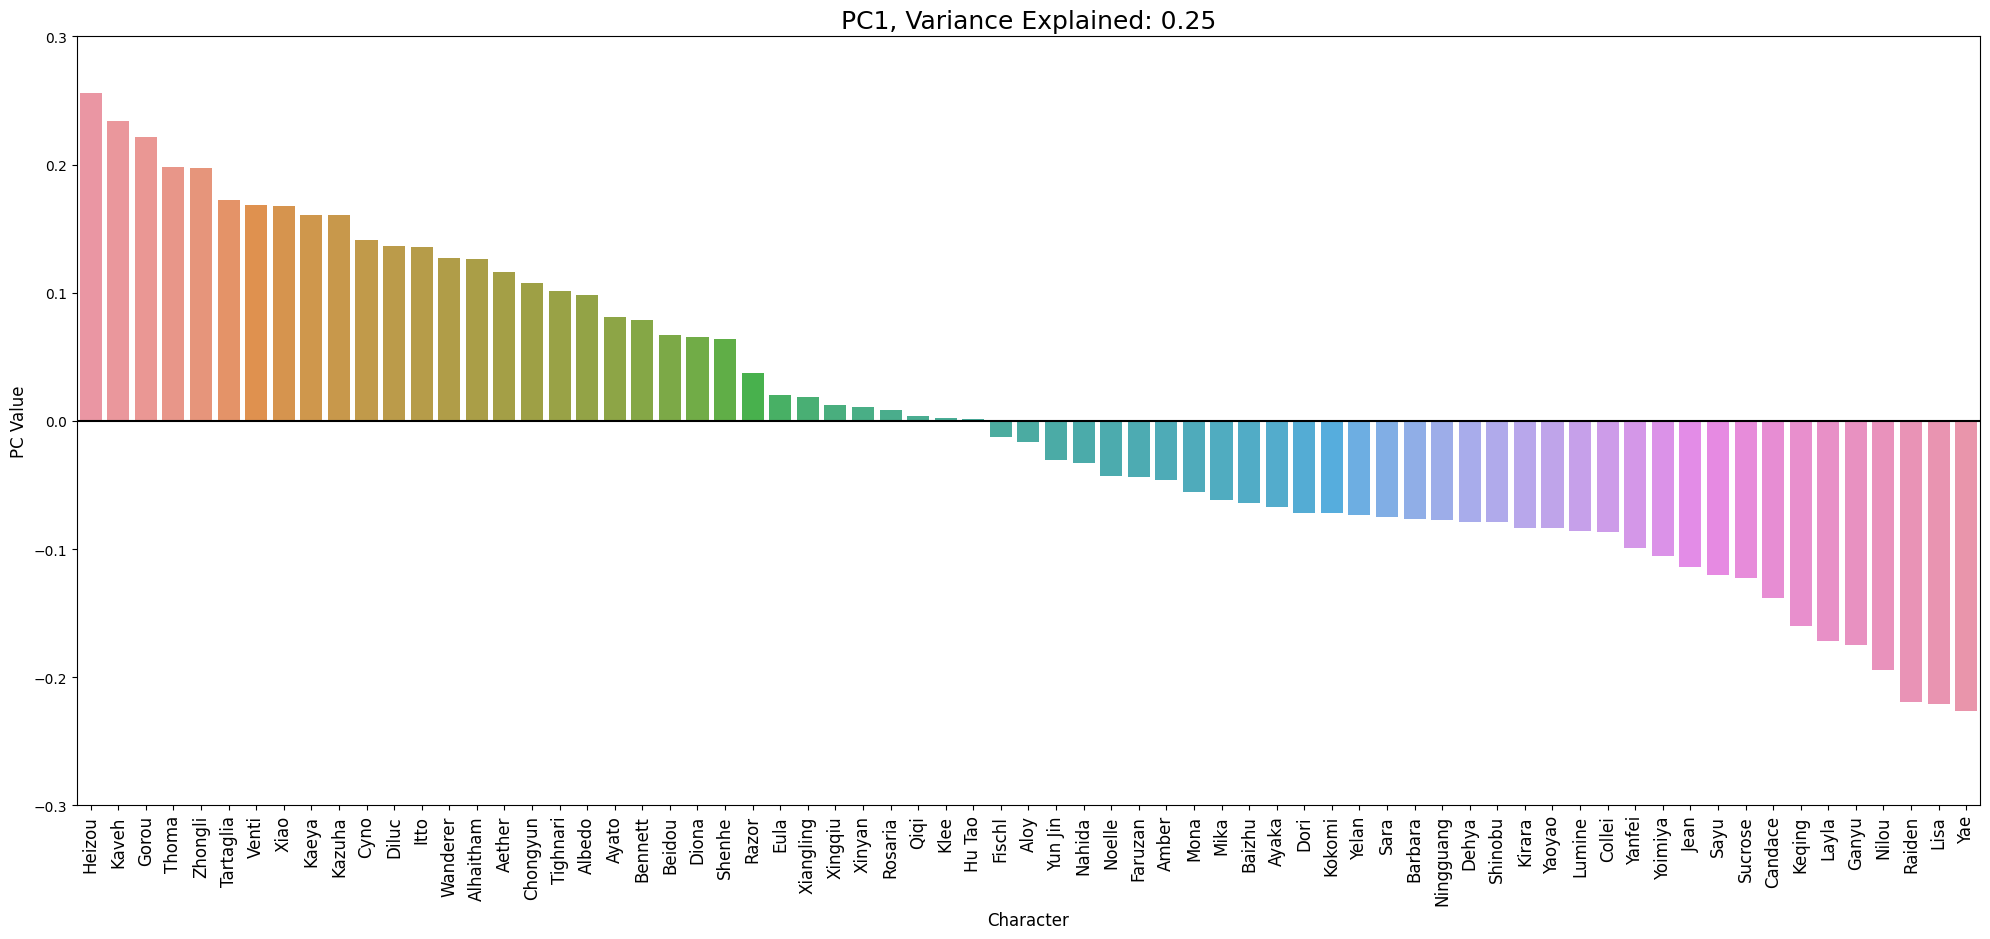

In [ ]:
num_comps = 1

plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(20, 9.5)

for curr_comp in range(1,num_comps+1):
  plt.subplot(num_comps,1,curr_comp)
  pdf_components = pdf_components.sort_values(by = [f'pc{curr_comp}'], ascending = [False])
  sns.barplot(pdf_components, x = 'Character', y = f'pc{curr_comp}')
  plt.xticks(fontsize=12, rotation=90)
  plt.xlabel('Character', fontsize = 12)
  plt.ylabel('PC Value', fontsize = 12)
  plt.ylim([-0.3, 0.3])
  plt.title('PC{:}, Variance Explained: {:.2}'.format(curr_comp, princomp_varianceratio[curr_comp-1]), fontsize = 18)
  plt.hlines(0, -1, 69, color = 'black')
  plt.xlim([-0.5, 68.5])
plt.tight_layout()

<ipython-input-51-c735312a9e57>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_comps,1,curr_comp)


<Figure size 640x480 with 0 Axes>

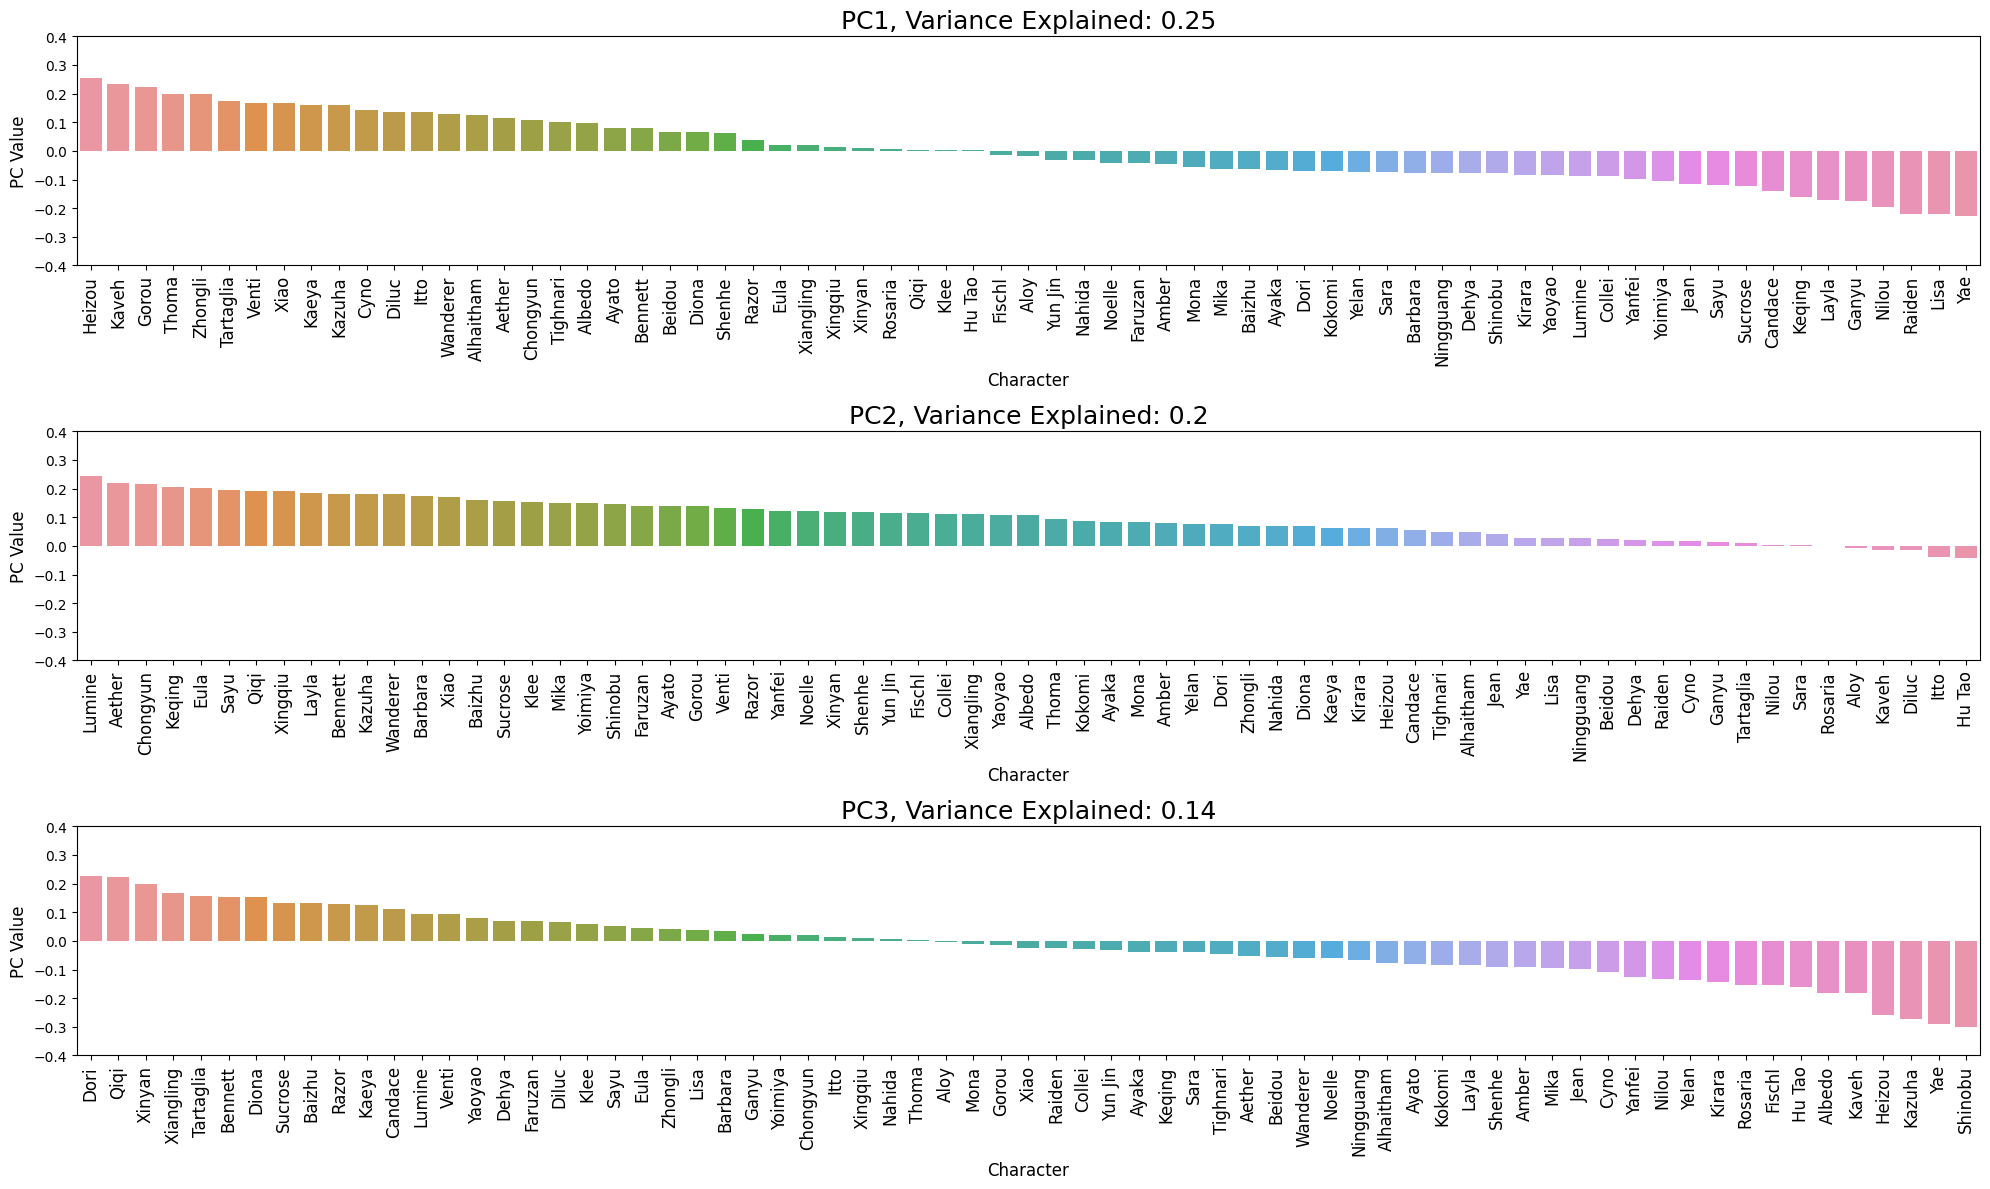

In [ ]:
num_comps = 3

plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(20, 4*num_comps)

for curr_comp in range(1,num_comps+1):
  plt.subplot(num_comps,1,curr_comp)
  pdf_components = pdf_components.sort_values(by = [f'pc{curr_comp}'], ascending = [False])
  sns.barplot(pdf_components, x = 'Character', y = f'pc{curr_comp}')
  plt.xticks(fontsize=12, rotation=90)
  plt.xlabel('Character', fontsize = 12)
  plt.ylabel('PC Value', fontsize = 12)
  plt.ylim([-0.4, 0.4])
  plt.title('PC{:}, Variance Explained: {:.2}'.format(curr_comp, princomp_varianceratio[curr_comp-1]), fontsize = 18)
plt.tight_layout()

# Previous years

In [ ]:
sheet_id_2021 = '13am5LWLgg3_KfcC2cxYlq0-WeaTBbVW5Rlq6JwGJC5k'
sheet_id_2022 = '1CrhlCaVxEa1V9HcAl4ymWGrTZq6RY9JP42pUgQxieOU'
sheet_name_2021 = 'Rank'
sheet_name_tier_2021 = 'Tier'
sheet_name_2022 = 'Rank%20Order%20Data'
sheet_name_tier_2022 = 'Tier%20Data'

url_rank_2021 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2021}/gviz/tq?tqx=out:csv&sheet={sheet_name_2021}'
url_rank_2022 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2022}/gviz/tq?tqx=out:csv&sheet={sheet_name_2022}'
url_tier_2021 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2021}/gviz/tq?tqx=out:csv&sheet={sheet_name_tier_2021}'
url_tier_2022 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2022}/gviz/tq?tqx=out:csv&sheet={sheet_name_tier_2022}'


In [ ]:
pdf_rank_2021_raw = pd.read_csv(url_rank_2021)
pdf_rank_2022_raw = pd.read_csv(url_rank_2022)

pdf_tier_2021_raw = pd.read_csv(url_tier_2021)
pdf_tier_2022_raw = pd.read_csv(url_tier_2022)
pdf_tier_2022_raw

,Name,Frozen,Shoe,Jobo,Chloe,Amethyst,Zabrina,Amy,Jason,Hiro,...,Tivi,David,Qihan,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Aether,1,4,1,5,1,2,1,2,5,...,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albedo,4,4,1,4,1,4,4,2,5,...,5,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aloy,1,2,2,1,1,2,1,1,1,...,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amber,3,5,3,2,2,3,3,2,1,...,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ayaka,4,2,2,1,2,3,4,1,1,...,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Barbara,4,5,3,1,3,2,2,1,1,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Beidou,3,5,5,5,3,3,4,4,3,...,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bennett,1,3,1,3,1,3,2,1,5,...,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chongyun,3,5,1,4,1,3,3,1,5,...,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Diluc,1,4,1,3,3,2,2,3,5,...,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pdf_rank_2021_edit = pdf_rank_2021_raw.copy()
pdf_rank_2022_edit = pdf_rank_2022_raw.loc[:, 'Name':'Qihan']

num_characters_2021 = len(pdf_rank_2021_edit)
num_characters_2022 = len(pdf_rank_2022_edit)

list_chars_2021 = list(pdf_rank_2021_edit['Name'].unique())
list_chars_2022 = list(pdf_rank_2022_edit['Name'].unique())
list_chars_2022

['Aether',
 'Albedo',
 'Aloy',
 'Amber',
 'Ayaka',
 'Barbara',
 'Beidou',
 'Bennett',
 'Chongyun',
 'Diluc',
 'Diona',
 'Eula',
 'Fischl',
 'Ganyu',
 'Gorou',
 'Hu Tao',
 'Itto',
 'Jean',
 'Kaeya',
 'Kazuha',
 'Keqing',
 'Klee',
 'Kokomi',
 'Lisa',
 'Lumine',
 'Mona',
 'Ningguang',
 'Noelle',
 'Qiqi',
 'Raiden',
 'Razor',
 'Rosaria',
 'Sara',
 'Sayu',
 'Shenhe',
 'Sucrose',
 'Tartaglia',
 'Thoma',
 'Venti',
 'Xiangling',
 'Xiao',
 'Xingqiu',
 'Xinyan',
 'Yae',
 'Yanfei',
 'Yoimiya',
 'Yun Jin',
 'Zhongli']

In [ ]:
pdf_rank_2021_long = pdf_rank_2021_edit.melt(id_vars = ['Name'])
pdf_rank_2021_long = pdf_rank_2021_long.rename(columns = {'variable' : 'Responder', 'value' : 'Rank'})
pdf_borda_2021 = pdf_rank_2021_long.copy()
pdf_borda_2021['Borda'] = num_characters_2021 - pdf_borda_2021['Rank']
pdf_borda_2021 = pdf_borda_2021.groupby('Name').agg({'Borda' : 'sum'})
pdf_borda_2021 = pdf_borda_2021.reset_index()
pdf_borda_2021 = pdf_borda_2021.sort_values(by = ['Borda'], ascending = False).reset_index(drop = True)
pdf_borda_2021['Borda Rank'] = pdf_borda_2021.index + 1
pdf_borda_2021['Percentile'] = (num_characters_2021 - pdf_borda_2021['Borda Rank']) / num_characters_2021 * 100
pdf_borda_2021['Year'] = 2021

pdf_borda_2021

,Name,Borda,Borda Rank,Percentile,Year
0,Zhongli,278,1,96.969697,2021
1,Qiqi,217,2,93.939394,2021
2,Ningguang,216,3,90.909091,2021
3,Beidou,212,4,87.878788,2021
4,Ganyu,209,5,84.848485,2021
5,Hu Tao,203,6,81.818182,2021
6,Xiao,202,7,78.787879,2021
7,Kaeya,188,8,75.757576,2021
8,Jean,187,9,72.727273,2021
9,Tartaglia,181,10,69.696970,2021


In [ ]:
pdf_rank_2022_long = pdf_rank_2022_edit.melt(id_vars = ['Name'])
pdf_rank_2022_long = pdf_rank_2022_long.rename(columns = {'variable' : 'Responder', 'value' : 'Rank'})
pdf_borda_2022 = pdf_rank_2022_long.copy()
pdf_borda_2022['Borda'] = num_characters_2022 - pdf_borda_2022['Rank']
pdf_borda_2022 = pdf_borda_2022.groupby('Name').agg({'Borda' : 'sum'})
pdf_borda_2022 = pdf_borda_2022.reset_index()
pdf_borda_2022 = pdf_borda_2022.sort_values(by = ['Borda'], ascending = False).reset_index(drop = True)
pdf_borda_2022['Borda Rank'] = pdf_borda_2022.index + 1
pdf_borda_2022['Percentile'] = (num_characters_2022 - pdf_borda_2022['Borda Rank']) / num_characters_2022 * 100
pdf_borda_2022['Year'] = 2022

pdf_borda_2022

,Name,Borda,Borda Rank,Percentile,Year
0,Beidou,589,1,97.916667,2022
1,Zhongli,580,2,95.833333,2022
2,Ningguang,571,3,93.750000,2022
3,Hu Tao,560,4,91.666667,2022
4,Xiao,516,5,89.583333,2022
5,Itto,510,6,87.500000,2022
6,Qiqi,484,7,85.416667,2022
7,Yae,483,8,83.333333,2022
8,Kazuha,481,9,81.250000,2022
9,Venti,479,10,79.166667,2022


In [ ]:
pdf_borda_2023 = pdf_rank_all_long_agg[['Character', ('Borda', 'sum'), 'Borda Rank']]
pdf_borda_2023 = pdf_borda_2023.rename(columns = {'Character' : 'Name', ('Borda', 'sum') : 'Borda'})
pdf_borda_2023['Percentile'] = (num_characters - pdf_borda_2023['Borda Rank']) / num_characters * 100
pdf_borda_2023['Year'] = 2023

pdf_borda_2023

,Name,Borda,Borda Rank,Percentile,Year
0,Nahida,657,1,98.550725,2023
1,Zhongli,647,2,97.101449,2023
2,Itto,627,3,95.652174,2023
3,Beidou,583,4,94.202899,2023
4,Ningguang,581,5,92.753623,2023
...,...,...,...,...,...
64,Noelle,229,65,5.797101,2023
65,Razor,219,66,4.347826,2023
66,Dori,141,67,2.898551,2023
67,Mika,108,68,1.449275,2023


In [ ]:
pdf_changes = pdf_borda_2023[['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2023'}).merge(
    pdf_borda_2022[['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2022'}), on = ['Name'], how = 'outer'
).merge(
    pdf_borda_2021[['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2021'}), on = ['Name'], how = 'outer'
)

pdf_changes['Percentile_Change_2023_2022'] = pdf_changes['Percentile_2023'] - pdf_changes['Percentile_2022']
pdf_changes['Percentile_Change_2023_2021'] = pdf_changes['Percentile_2023'] - pdf_changes['Percentile_2021']

pdf_changes

,Name,Percentile_2023,Percentile_2022,Percentile_2021,Percentile_Change_2023_2022,Percentile_Change_2023_2021
0,Nahida,98.550725,NaN,NaN,NaN,NaN
1,Zhongli,97.101449,95.833333,96.969697,1.268116,0.131752
2,Itto,95.652174,87.500000,NaN,8.152174,NaN
3,Beidou,94.202899,97.916667,87.878788,-3.713768,6.324111
4,Ningguang,92.753623,93.750000,90.909091,-0.996377,1.844532
...,...,...,...,...,...,...
64,Noelle,5.797101,14.583333,30.303030,-8.786232,-24.505929
65,Razor,4.347826,2.083333,24.242424,2.264493,-19.894598
66,Dori,2.898551,NaN,NaN,NaN,NaN
67,Mika,1.449275,NaN,NaN,NaN,NaN


In [ ]:
pdf_tier_2021_edit = pdf_tier_2021_raw.copy()
pdf_tier_2022_edit = pdf_tier_2022_raw.loc[:, 'Name':'Qihan']

pdf_tier_2022_edit

,Name,Frozen,Shoe,Jobo,Chloe,Amethyst,Zabrina,Amy,Jason,Hiro,Guilty,Alice,Seika,John,Tivi,David,Qihan
0,Aether,1,4,1,5,1,2,1,2,5,4,1,2,2,3,1,3
1,Albedo,4,4,1,4,1,4,4,2,5,5,3,2,3,5,3,3
2,Aloy,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,2
3,Amber,3,5,3,2,2,3,3,2,1,3,2,3,2,2,3,3
4,Ayaka,4,2,2,1,2,3,4,1,1,1,1,4,3,3,2,2
5,Barbara,4,5,3,1,3,2,2,1,1,4,1,2,3,2,2,2
6,Beidou,3,5,5,5,3,3,4,4,3,5,4,4,4,4,4,3
7,Bennett,1,3,1,3,1,3,2,1,5,3,2,3,5,2,3,3
8,Chongyun,3,5,1,4,1,3,3,1,5,4,4,1,5,1,2,3
9,Diluc,1,4,1,3,3,2,2,3,5,3,2,3,3,3,2,1


In [ ]:
pdf_tier_2021_agg = pdf_tier_2021_edit.melt(id_vars = 'Name').rename(columns = {'variable' : 'Rater', 'value' : 'Points'})
pdf_tier_2021_agg = pdf_tier_2021_agg.groupby('Name').agg(
    {
        'Points' : ['mean', 'median']
    }
)
pdf_tier_2021_agg.columns = pdf_tier_2021_agg.columns.to_flat_index()
pdf_tier_2021_agg = pdf_tier_2021_agg.reset_index()
pdf_tier_2021_agg = pdf_tier_2021_agg.rename(columns = {
    'Name' : 'Character',
    ('Points', 'mean') : 'mean_points__2021',
    ('Points', 'median') : 'median_points__2021',
})

pdf_tier_2022_agg = pdf_tier_2022_edit.melt(id_vars = 'Name').rename(columns = {'variable' : 'Rater', 'value' : 'Points'})
pdf_tier_2022_agg = pdf_tier_2022_agg.groupby('Name').agg(
    {
        'Points' : ['mean', 'median']
    }
)
pdf_tier_2022_agg.columns = pdf_tier_2022_agg.columns.to_flat_index()
pdf_tier_2022_agg = pdf_tier_2022_agg.reset_index()
pdf_tier_2022_agg = pdf_tier_2022_agg.rename(columns = {
    'Name' : 'Character',
    ('Points', 'mean') : 'mean_points__2022',
    ('Points', 'median') : 'median_points__2022',
})

pdf_tier_2023_agg = pdf_rank_all_long_agg.copy()
pdf_tier_2023_agg = pdf_tier_2023_agg[['Character', ('Points', 'mean'), ('Points', 'median')]]
pdf_tier_2023_agg = pdf_tier_2023_agg.rename(columns = {
    ('Points', 'mean') : 'mean_points__2023',
    ('Points', 'median') : 'median_points__2023',
})

pdf_tier_2023_agg

,Character,mean_points__2023,median_points__2023
0,Nahida,4.166667,4.0
1,Zhongli,4.166667,5.0
2,Itto,3.833333,4.0
3,Beidou,3.333333,3.0
4,Ningguang,3.583333,3.5
...,...,...,...
64,Noelle,1.666667,1.0
65,Razor,1.833333,1.5
66,Dori,1.750000,1.0
67,Mika,1.666667,1.0


In [ ]:
pdf_tier_agg_allyears = pdf_tier_2023_agg.merge(
    pdf_tier_2022_agg, on = 'Character', how = 'outer'
).merge(
    pdf_tier_2021_agg, on = 'Character', how = 'outer'
)

pdf_tier_agg_allyears

,Character,mean_points__2023,median_points__2023,mean_points__2022,median_points__2022,mean_points__2021,median_points__2021
0,Nahida,4.166667,4.0,NaN,NaN,NaN,NaN
1,Zhongli,4.166667,5.0,4.1250,5.0,4.3,5.0
2,Itto,3.833333,4.0,3.8750,4.0,NaN,NaN
3,Beidou,3.333333,3.0,3.9375,4.0,3.3,3.0
4,Ningguang,3.583333,3.5,3.7500,3.5,3.4,4.0
...,...,...,...,...,...,...,...
64,Noelle,1.666667,1.0,2.1250,2.0,2.4,2.5
65,Razor,1.833333,1.5,2.0000,2.0,2.3,2.0
66,Dori,1.750000,1.0,NaN,NaN,NaN,NaN
67,Mika,1.666667,1.0,NaN,NaN,NaN,NaN


In [ ]:
pdf_years_long = pdf_changes[['Name', 'Percentile_2021', 'Percentile_2022', 'Percentile_2023']]
pdf_years_long = pdf_years_long.rename(columns = {
    'Percentile_2021' : '2021', 'Percentile_2022' : '2022', 'Percentile_2023' : '2023'
})
pdf_years_long = pdf_years_long[pdf_years_long['2022'].notnull()]
pdf_years_long = pdf_years_long.melt(id_vars = 'Name')
pdf_years_long = pdf_years_long.rename(columns = {'Name' : 'Character', 'variable' : 'Year', 'value' : 'Percentile'})
pdf_years_long = pdf_years_long.merge(pdf_meta_edit, on = 'Character')

pdf_years_long

,Character,Year,Percentile,Body Type,Height,Gender,Affiliated Area,Vision,Skin Color,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year,Unit Release Block
0,Zhongli,2021,96.969697,Tall Male,Tall,Male,Liyue,Geo,Light,5,Limited 5*,1.0,3.4,9.0,1.1,2020,1.0
1,Zhongli,2022,95.833333,Tall Male,Tall,Male,Liyue,Geo,Light,5,Limited 5*,1.0,3.4,9.0,1.1,2020,1.0
2,Zhongli,2023,97.101449,Tall Male,Tall,Male,Liyue,Geo,Light,5,Limited 5*,1.0,3.4,9.0,1.1,2020,1.0
3,Itto,2021,NaN,Tall Male,Tall,Male,Inazuma,Geo,Light,5,Limited 5*,2.3,3.7,9.0,2.3,2021,2.0
4,Itto,2022,87.500000,Tall Male,Tall,Male,Inazuma,Geo,Light,5,Limited 5*,2.3,3.7,9.0,2.3,2021,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Razor,2022,2.083333,Short Male,Short,Male,Mondstadt,Electro,Light,4,4*,1.0,3.5,6.0,1.0,2020,0.0
140,Razor,2023,4.347826,Short Male,Short,Male,Mondstadt,Electro,Light,4,4*,1.0,3.5,6.0,1.0,2020,0.0
141,Aloy,2021,NaN,Short Female,Short,Female,Outlander,Cryo,Light,5,Outlander,nan,nan,NaN,nan,2021,nan
142,Aloy,2022,0.000000,Short Female,Short,Female,Outlander,Cryo,Light,5,Outlander,nan,nan,NaN,nan,2021,nan


In [ ]:
element_palettes = {
  'Pyro' : 'Reds_r',
  'Electro' : 'PuRd_r',
  'Hydro' : 'Blues_r',
  'Dendro' : 'Greens_r',
  'Anemo' : 'Greens_r',
  'Cryo' : 'Greys_r',
  'Geo' : 'Oranges_r',
}

<Figure size 640x480 with 0 Axes>

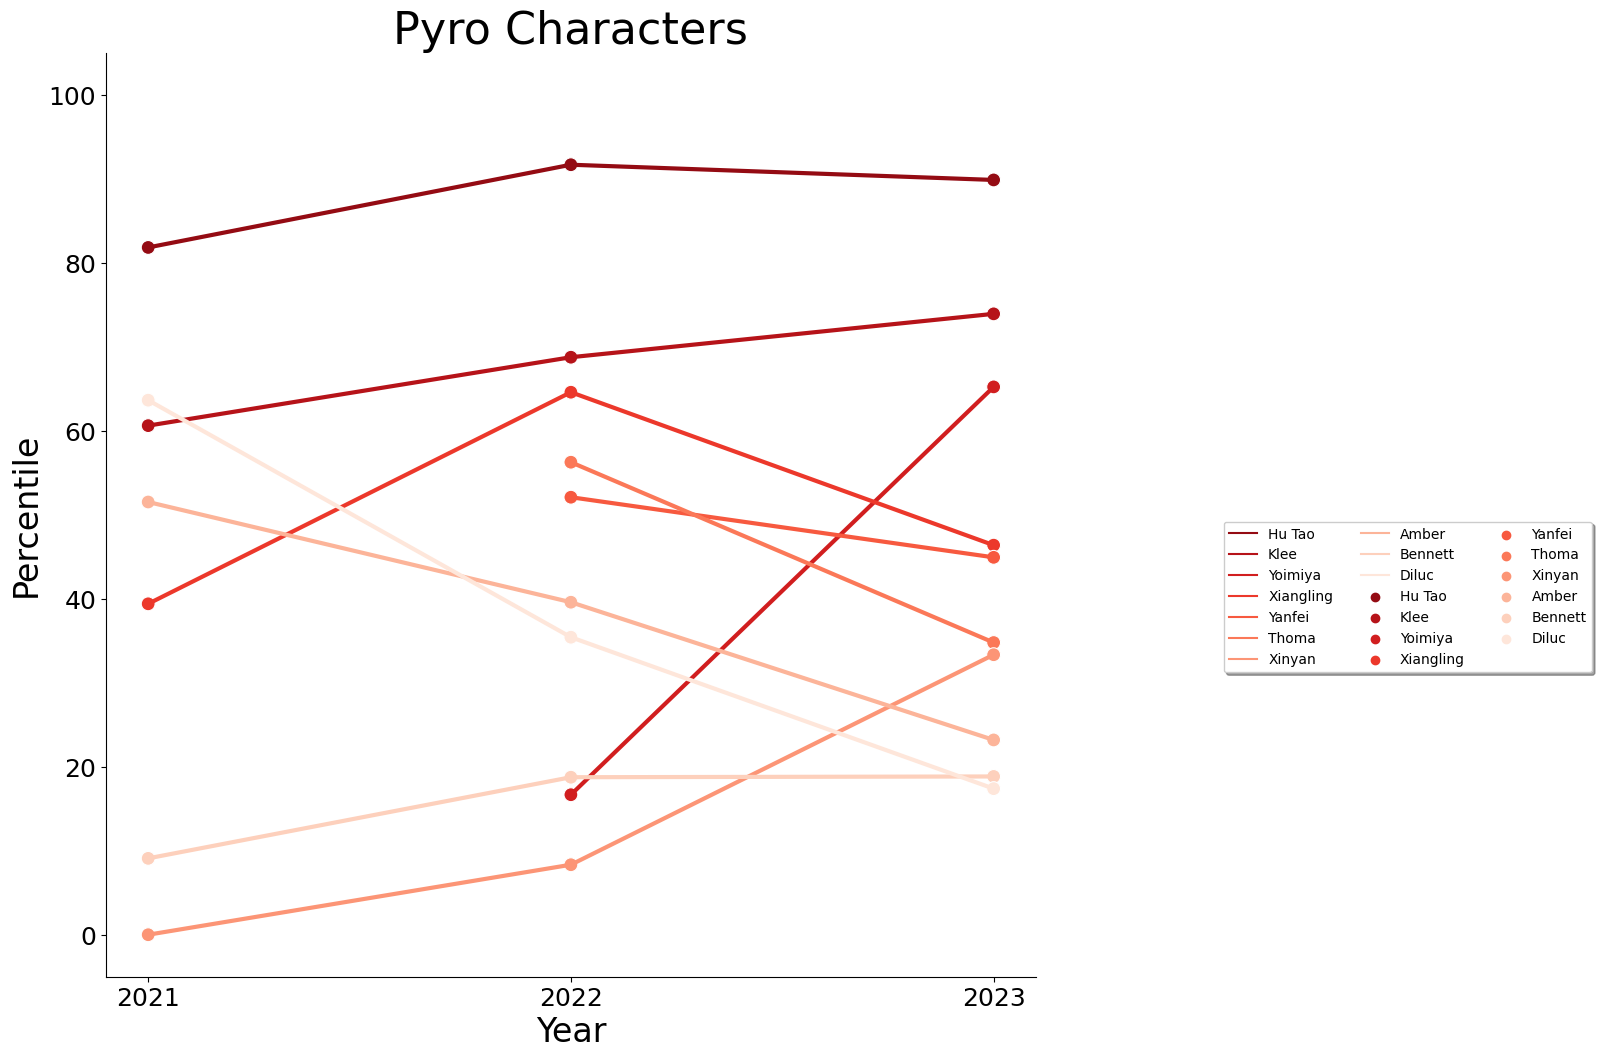

<Figure size 640x480 with 0 Axes>

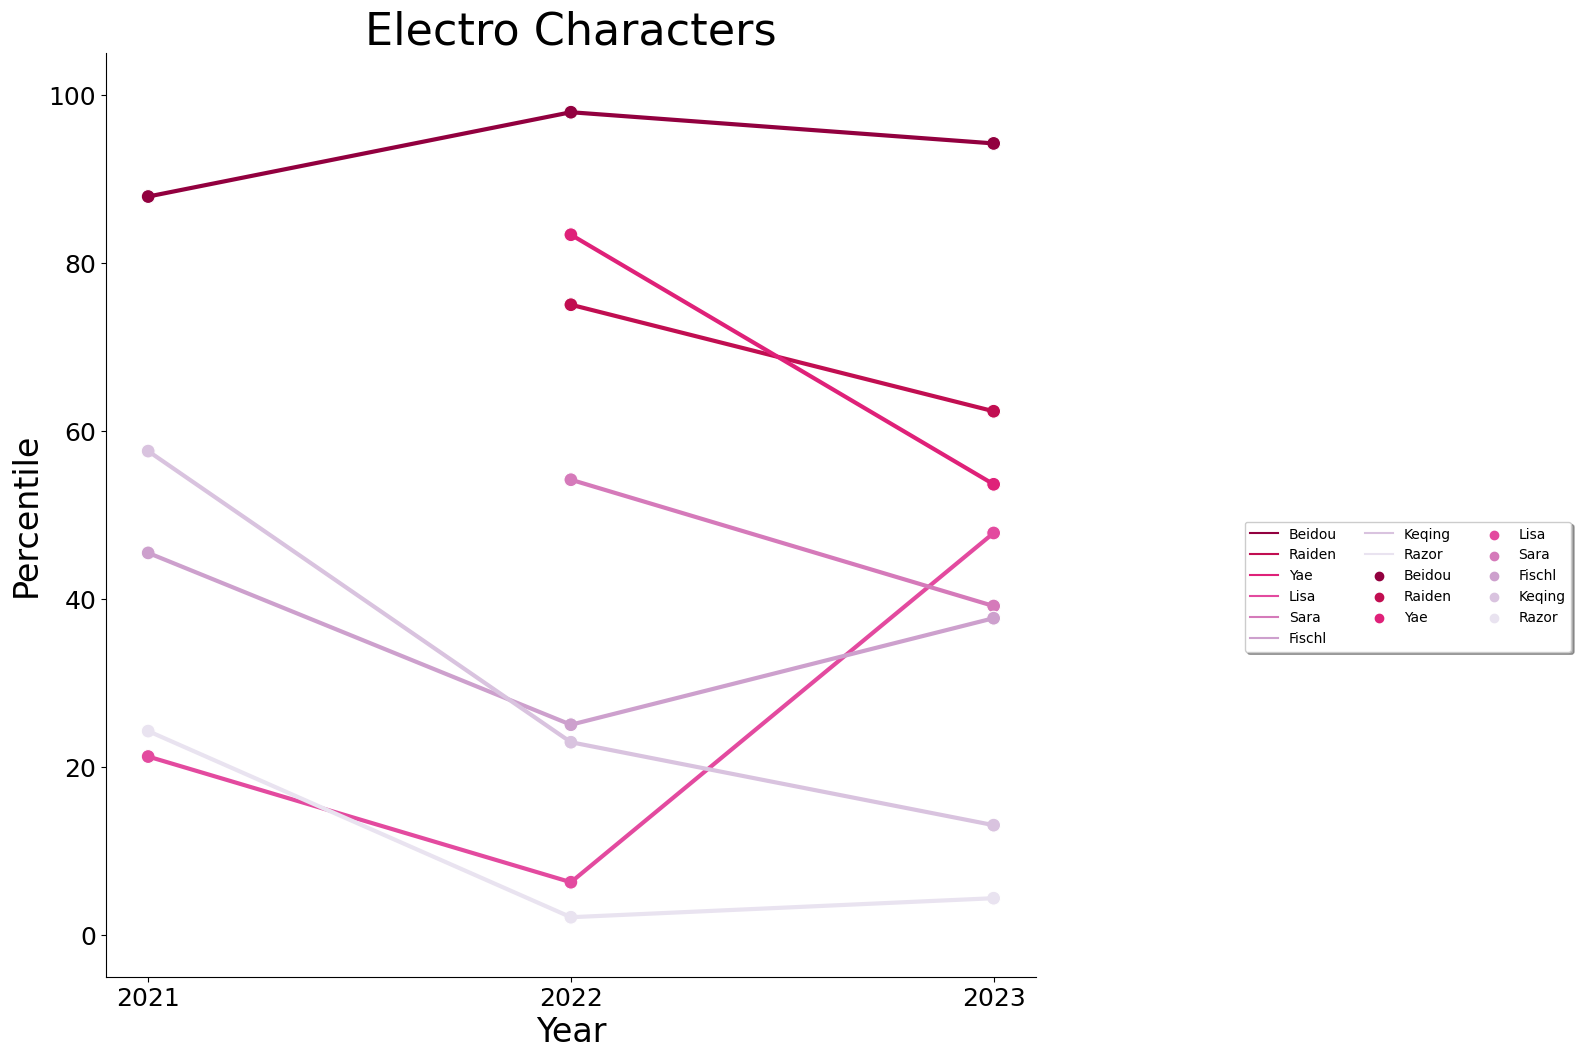

<Figure size 640x480 with 0 Axes>

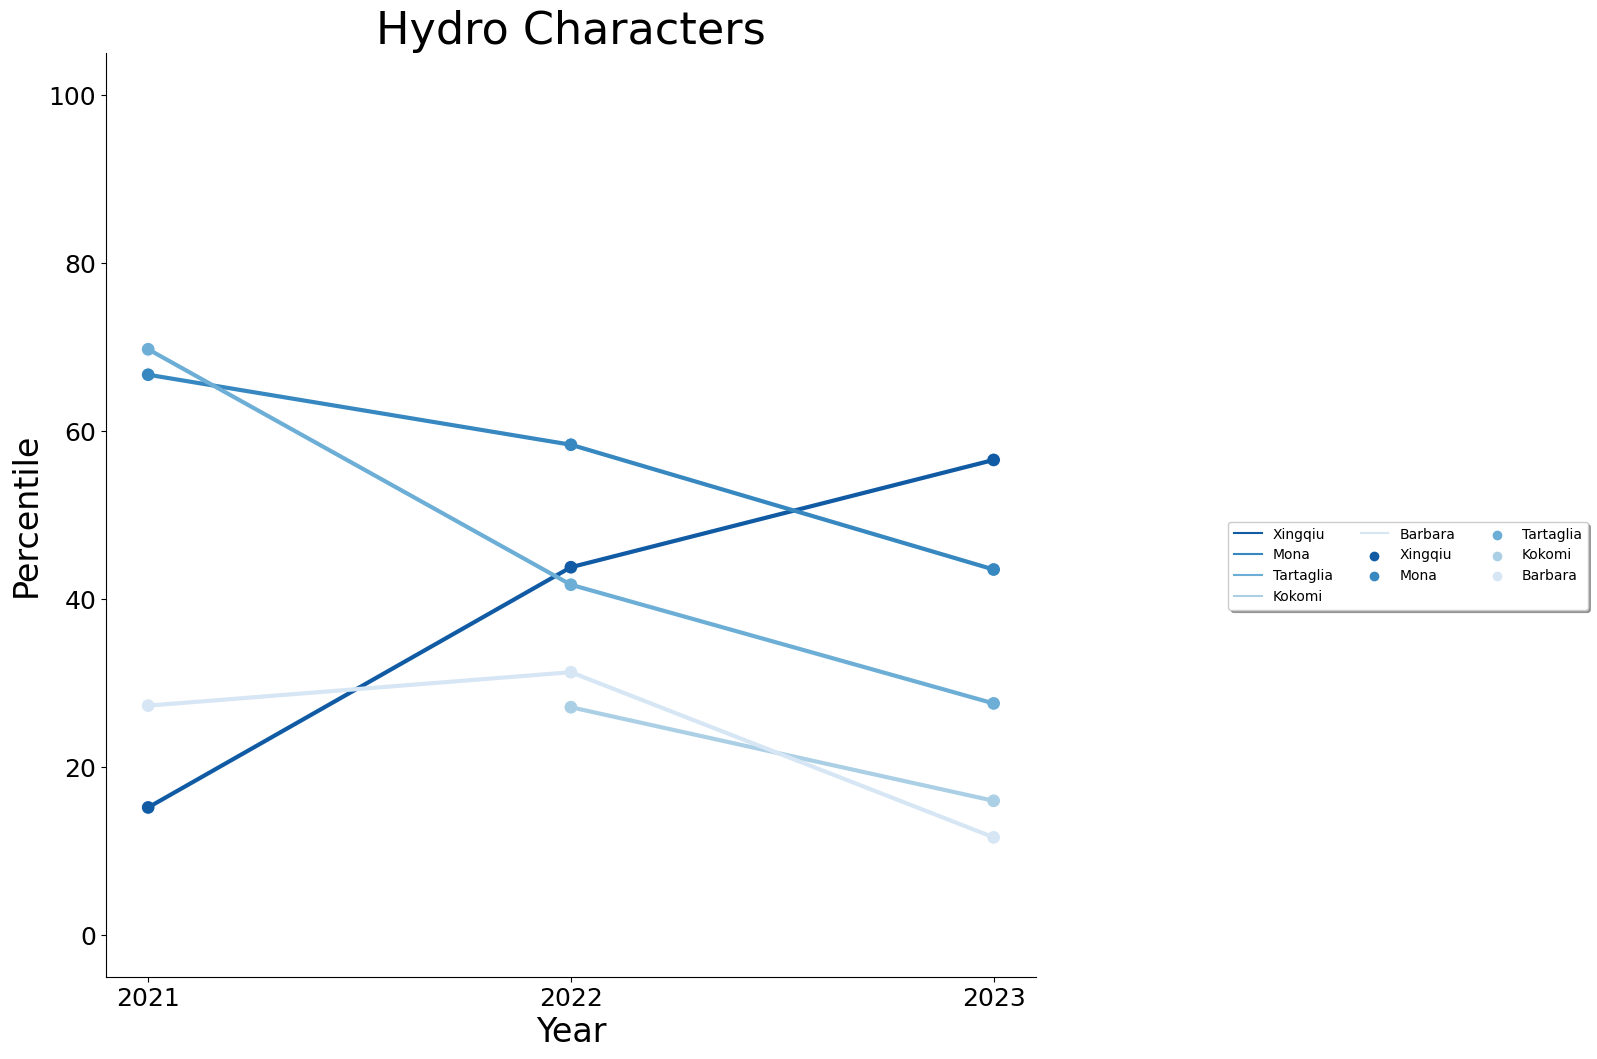

<Figure size 640x480 with 0 Axes>

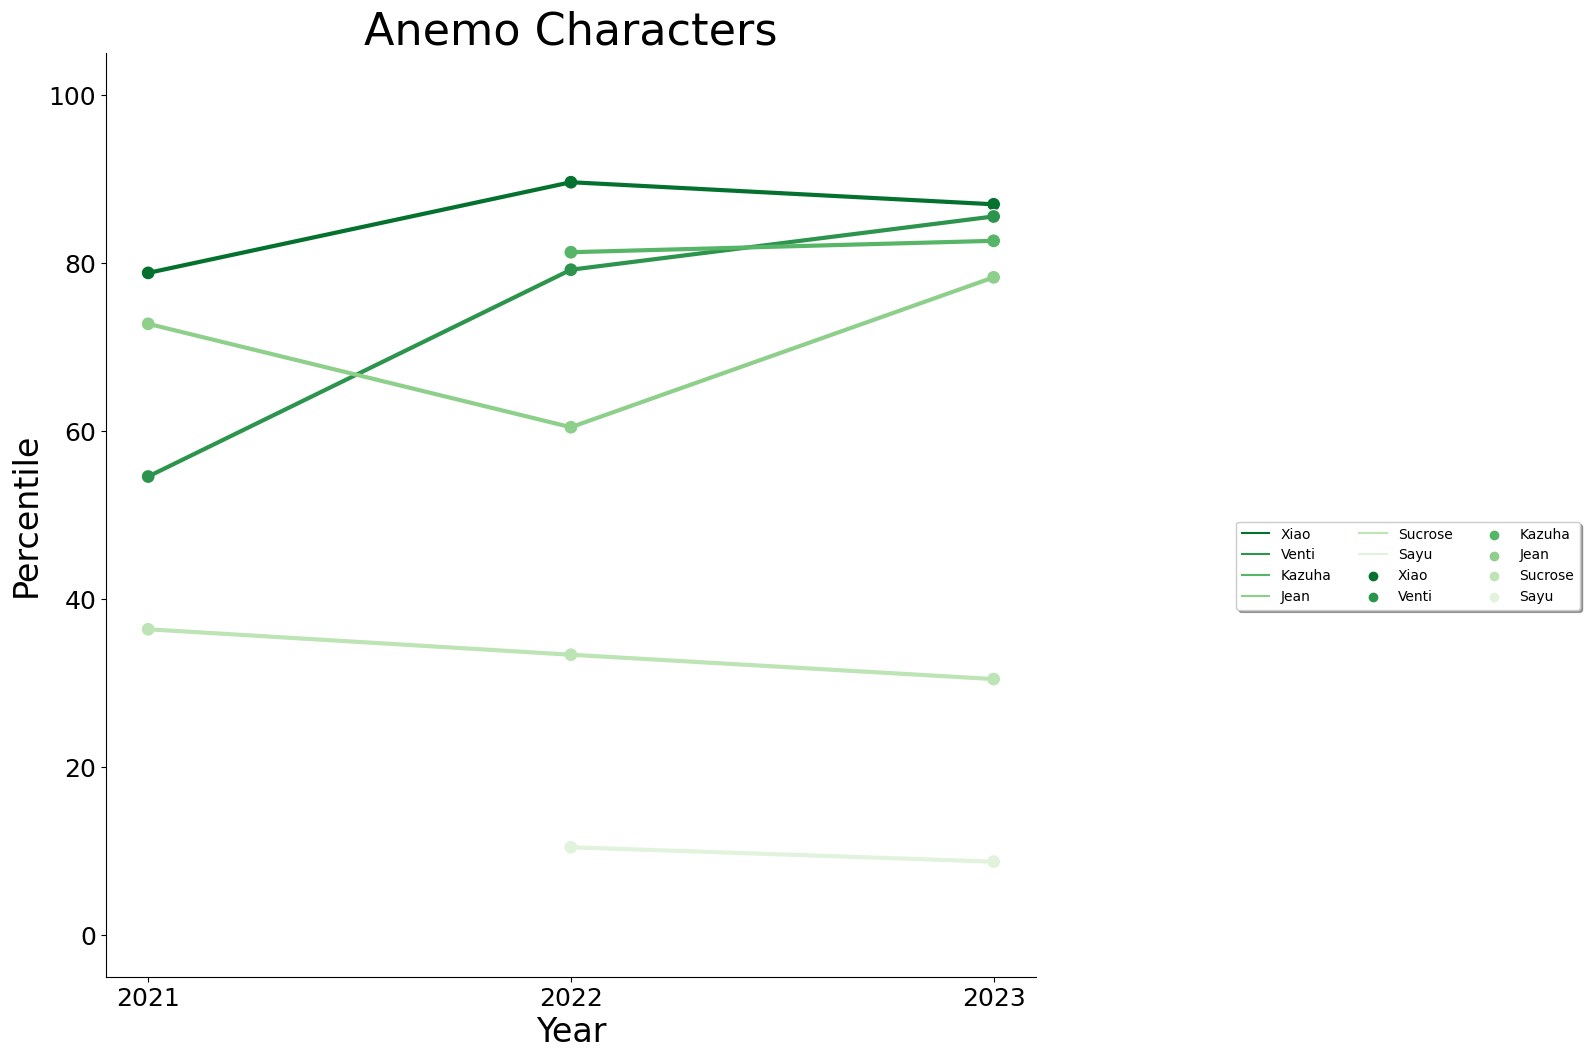

<Figure size 640x480 with 0 Axes>

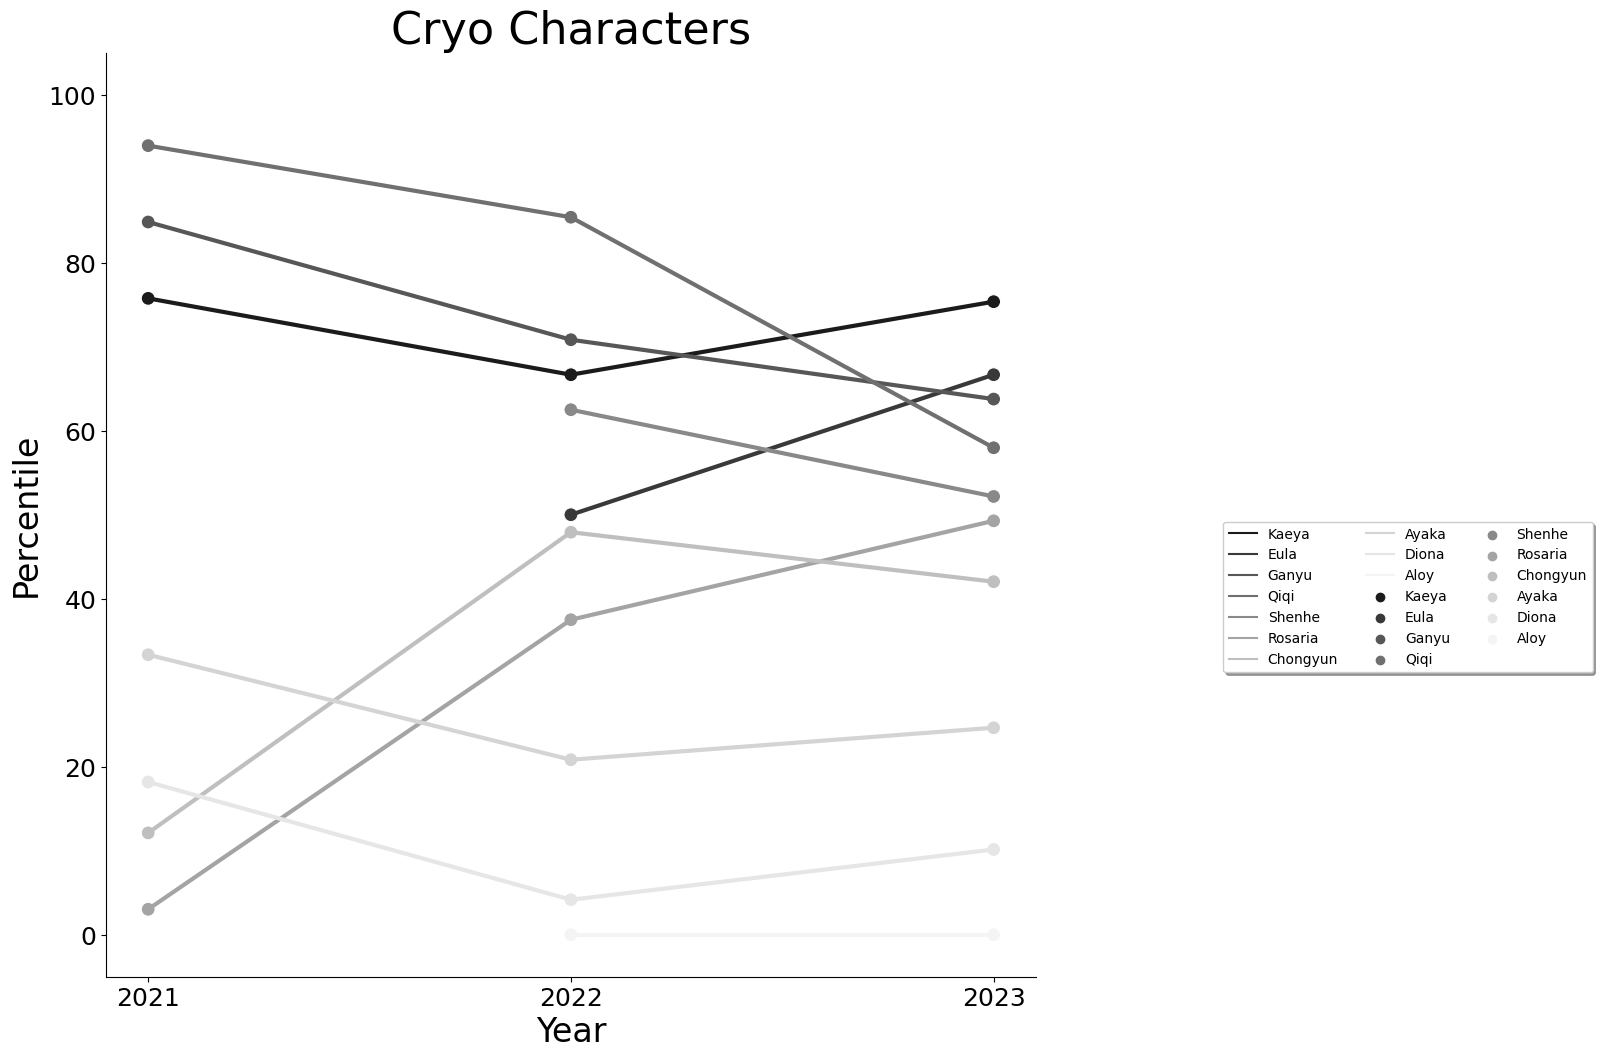

<Figure size 640x480 with 0 Axes>

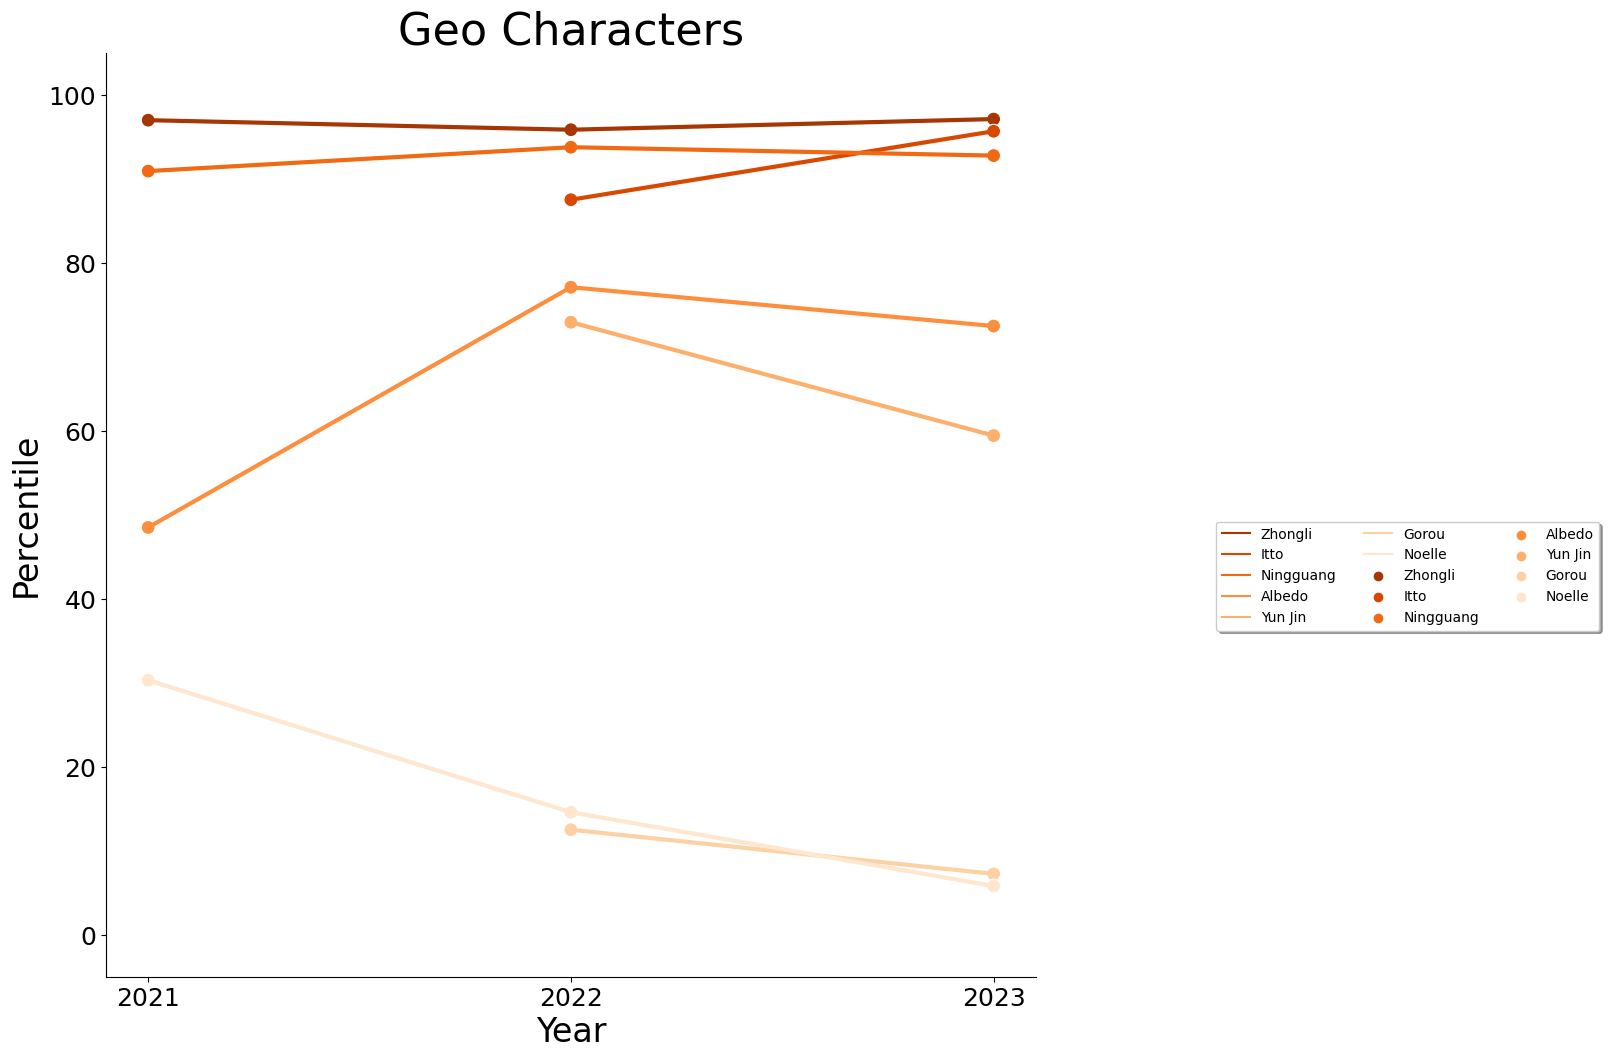

In [ ]:
for curr_element in ['Pyro', 'Electro', 'Hydro', 'Anemo', 'Cryo', 'Geo']:

  plt.figure()
  fig, ax = plt.subplots()
  fig.set_size_inches(12, 12)

  pdf_years_long_filt = pdf_years_long[
      (pdf_years_long['Vision'] == curr_element)
  ]
  sns.lineplot(
      pdf_years_long_filt, x = 'Year', y = 'Percentile', hue = 'Character',
      linewidth = 3, palette = element_palettes[curr_element]
  )
  sns.scatterplot(
      pdf_years_long_filt, x = 'Year', y = 'Percentile', hue = 'Character',
      s = 100, palette = element_palettes[curr_element]
  )
  ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.5),
            ncol=3, fancybox=True, shadow=True)

  plt.ylim([-5, 105])
  plt.xlabel('Year', size = 24)
  plt.ylabel('Percentile', size = 24)
  plt.xticks(fontsize=18, rotation=0)
  plt.yticks(fontsize=18, rotation=0)
  plt.title(f'{curr_element} Characters', size = 32)
  ax.spines[['right', 'top']].set_visible(False)

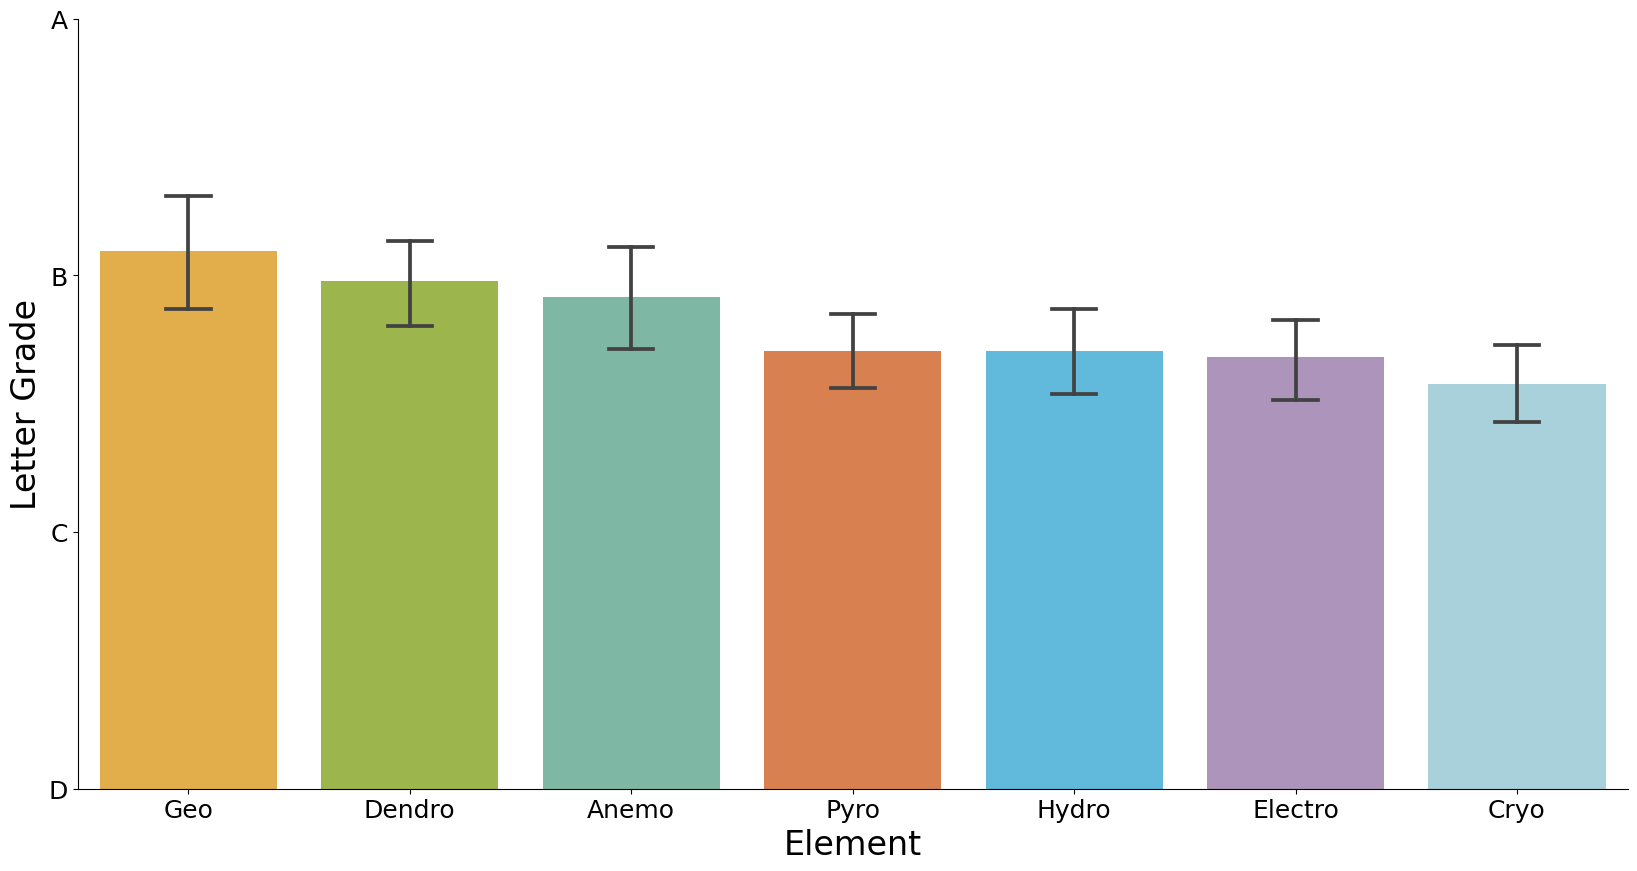

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(20, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Vision'] != 'Unknown'
]
list_order = ['Geo', 'Dendro', 'Anemo', 'Pyro', 'Hydro', 'Electro', 'Cryo']
ax = sns.barplot(pdf_rank_meta_filt, x="Vision", y='Points',
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=[genshincolor_dict['Geo'], genshincolor_dict['Dendro'], genshincolor_dict['Anemo'], genshincolor_dict['Pyro'], genshincolor_dict['Hydro'], genshincolor_dict['Electro'], genshincolor_dict['Cryo']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Element', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
pdf_rank_2021_long['Percentile'] = (num_characters_2021 - pdf_rank_2021_long['Rank']) / num_characters_2021 * 100
pdf_rank_2021_long = pdf_rank_2021_long.rename(
    columns = {
        'Name' : 'Character',
        'Rank' : 'Rank_2021',
        'Percentile' : 'Percentile_2021',
    }
)
pdf_rank_2021_long['Responder'] = pdf_rank_2021_long['Responder'].replace({'FrOzEn' : 'Frozen'})
pdf_rank_2021_long

,Character,Responder,Rank_2021,Percentile_2021
0,Aether,David,33,0.000000
1,Albedo,David,32,3.030303
2,Amber,David,5,84.848485
3,Ayaka,David,16,51.515152
4,Barbara,David,12,63.636364
...,...,...,...,...
325,Xiangling,John,10,69.696970
326,Xiao,John,16,51.515152
327,Xingqiu,John,31,6.060606
328,Xinyan,John,30,9.090909


In [ ]:
pdf_rank_2022_long['Percentile'] = (num_characters_2022 - pdf_rank_2022_long['Rank']) / num_characters_2022 * 100
pdf_rank_2022_long = pdf_rank_2022_long.rename(
    columns = {
        'Name' : 'Character',
        'Rank' : 'Rank_2022',
        'Percentile' : 'Percentile_2022',
    }
)
pdf_rank_2022_long

,Character,Responder,Rank_2022,Percentile_2022
0,Aether,Frozen,44,8.333333
1,Albedo,Frozen,15,68.750000
2,Aloy,Frozen,47,2.083333
3,Amber,Frozen,32,33.333333
4,Ayaka,Frozen,8,83.333333
...,...,...,...,...
763,Yae,Qihan,3,93.750000
764,Yanfei,Qihan,20,58.333333
765,Yoimiya,Qihan,13,72.916667
766,Yun Jin,Qihan,25,47.916667


In [ ]:
pdf_rank_2023_long = pdf_rank_all_long.copy()
pdf_rank_2023_long['Percentile'] = (num_characters - pdf_rank_2023_long['Rank']) / num_characters * 100
pdf_rank_2023_long = pdf_rank_2023_long[['Character', 'Responder', 'Rank', 'Percentile']]
pdf_rank_2023_long = pdf_rank_2023_long.rename(
    columns = {
        'Name' : 'Character',
        'Rank' : 'Rank_2023',
        'Percentile' : 'Percentile_2023',
    }
)
pdf_rank_2023_long['Responder'] = pdf_rank_2023_long['Responder'].replace({'FrOzEn' : 'Frozen'})

pdf_rank_2023_long

,Character,Responder,Rank_2023,Percentile_2023
0,Aether,David,69,0.000000
1,Albedo,David,35,49.275362
2,Alhaitham,David,33,52.173913
3,Aloy,David,67,2.898551
4,Amber,David,23,66.666667
...,...,...,...,...
64,Yaoyao,Erin,19,72.463768
65,Yelan,Erin,38,44.927536
66,Yoimiya,Erin,24,65.217391
67,Yun Jin,Erin,40,42.028986


In [ ]:
pdf_rank_allyears_long = pdf_rank_2023_long.merge(
    pdf_rank_2022_long, on = ['Character', 'Responder'], how = 'outer'
).merge(
    pdf_rank_2021_long, on = ['Character', 'Responder'], how = 'outer'
)

pdf_rank_allyears_long

,Character,Responder,Rank_2023,Percentile_2023,Rank_2022,Percentile_2022,Rank_2021,Percentile_2021
0,Aether,David,69.0,0.000000,48.0,0.000000,33.0,0.000000
1,Albedo,David,35.0,49.275362,17.0,64.583333,32.0,3.030303
2,Alhaitham,David,33.0,52.173913,NaN,NaN,NaN,NaN
3,Aloy,David,67.0,2.898551,44.0,8.333333,NaN,NaN
4,Amber,David,23.0,66.666667,13.0,72.916667,5.0,84.848485
...,...,...,...,...,...,...,...,...
1096,Xiangling,Yuhan,NaN,NaN,NaN,NaN,25.0,24.242424
1097,Xiao,Yuhan,NaN,NaN,NaN,NaN,13.0,60.606061
1098,Xingqiu,Yuhan,NaN,NaN,NaN,NaN,11.0,66.666667
1099,Xinyan,Yuhan,NaN,NaN,NaN,NaN,30.0,9.090909


In [ ]:
pdf_diff_2023_2022 = pdf_rank_allyears_long[
    pdf_rank_allyears_long['Rank_2023'].notnull() &
    pdf_rank_allyears_long['Rank_2022'].notnull()
]
pdf_diff_2023_2022['Percentile_Diff'] = pdf_diff_2023_2022['Percentile_2023'] - pdf_diff_2023_2022['Percentile_2022']
pdf_diff_2023_2022['Percentile_Abs_Diff'] = np.abs(pdf_diff_2023_2022['Percentile_Diff'])

pdf_diff_2023_2022

<ipython-input-70-25db82b04aa5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_diff_2023_2022['Percentile_Diff'] = pdf_diff_2023_2022['Percentile_2023'] - pdf_diff_2023_2022['Percentile_2022']
<ipython-input-70-25db82b04aa5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_diff_2023_2022['Percentile_Abs_Diff'] = np.abs(pdf_diff_2023_2022['Percentile_Diff'])


,Character,Responder,Rank_2023,Percentile_2023,Rank_2022,Percentile_2022,Rank_2021,Percentile_2021,Percentile_Diff,Percentile_Abs_Diff
0,Aether,David,69.0,0.000000,48.0,0.000000,33.0,0.000000,0.000000,0.000000
1,Albedo,David,35.0,49.275362,17.0,64.583333,32.0,3.030303,-15.307971,15.307971
3,Aloy,David,67.0,2.898551,44.0,8.333333,NaN,NaN,-5.434783,5.434783
4,Amber,David,23.0,66.666667,13.0,72.916667,5.0,84.848485,-6.250000,6.250000
5,Ayaka,David,49.0,28.985507,31.0,35.416667,16.0,51.515152,-6.431159,6.431159
...,...,...,...,...,...,...,...,...,...,...
752,Yae,Zabrina,1.0,98.550725,1.0,97.916667,NaN,NaN,0.634058,0.634058
753,Yanfei,Zabrina,3.0,95.652174,2.0,95.833333,NaN,NaN,-0.181159,0.181159
756,Yoimiya,Zabrina,61.0,11.594203,44.0,8.333333,NaN,NaN,3.260870,3.260870
757,Yun Jin,Zabrina,65.0,5.797101,46.0,4.166667,NaN,NaN,1.630435,1.630435


In [ ]:
pdf_diff_2023_2022_agg = pdf_diff_2023_2022.groupby('Responder').agg(
    {'Percentile_Abs_Diff' : ['mean', 'median']}
)
pdf_diff_2023_2022_agg

Percentile_Abs_Diff           
                         mean     median
Responder                               
Alice               12.099940   9.375000
Amethyst            14.341787  10.552536
Amy                 12.084843   8.514493
Chloe               12.492452   9.737319
David               13.013285  10.416667
Frozen              11.345109   9.510870
Hiro                12.273551  10.280797
Jason                4.211957   2.083333
Seika                4.532760   2.264493
Shoe                26.634209  26.902174
Zabrina              5.238527   1.675725

In [ ]:
pdf_diff_2023_2021 = pdf_rank_allyears_long[
    pdf_rank_allyears_long['Rank_2023'].notnull() &
    pdf_rank_allyears_long['Rank_2021'].notnull()
]
pdf_diff_2023_2021['Percentile_Diff'] = pdf_diff_2023_2021['Percentile_2023'] - pdf_diff_2023_2021['Percentile_2021']
pdf_diff_2023_2021['Percentile_Abs_Diff'] = np.abs(pdf_diff_2023_2021['Percentile_Diff'])

pdf_diff_2023_2021

<ipython-input-72-ecebcda09b30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_diff_2023_2021['Percentile_Diff'] = pdf_diff_2023_2021['Percentile_2023'] - pdf_diff_2023_2021['Percentile_2021']
<ipython-input-72-ecebcda09b30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_diff_2023_2021['Percentile_Abs_Diff'] = np.abs(pdf_diff_2023_2021['Percentile_Diff'])


,Character,Responder,Rank_2023,Percentile_2023,Rank_2022,Percentile_2022,Rank_2021,Percentile_2021,Percentile_Diff,Percentile_Abs_Diff
0,Aether,David,69.0,0.000000,48.0,0.000000,33.0,0.000000,0.000000,0.000000
1,Albedo,David,35.0,49.275362,17.0,64.583333,32.0,3.030303,46.245059,46.245059
4,Amber,David,23.0,66.666667,13.0,72.916667,5.0,84.848485,-18.181818,18.181818
5,Ayaka,David,49.0,28.985507,31.0,35.416667,16.0,51.515152,-22.529644,22.529644
8,Barbara,David,63.0,8.695652,33.0,31.250000,12.0,63.636364,-54.940711,54.940711
...,...,...,...,...,...,...,...,...,...,...
679,Xiangling,Alice,23.0,66.666667,10.0,79.166667,12.0,63.636364,3.030303,3.030303
680,Xiao,Alice,47.0,31.884058,18.0,62.500000,17.0,48.484848,-16.600791,16.600791
681,Xingqiu,Alice,24.0,65.217391,14.0,70.833333,15.0,54.545455,10.671937,10.671937
682,Xinyan,Alice,21.0,69.565217,23.0,52.083333,30.0,9.090909,60.474308,60.474308


In [ ]:
pdf_diff_2023_2021_agg = pdf_diff_2023_2021.groupby('Responder').agg(
    {'Percentile_Abs_Diff' : ['mean', 'median']}
)
pdf_diff_2023_2021_agg

Percentile_Abs_Diff           
                         mean     median
Responder                               
Alice               18.589053  11.198946
Amy                 29.795984  30.434783
Chloe               20.309818  13.833992
David               24.645666  18.181818
Jason               13.853955   9.617918
Seika               15.498862  14.756258